In [1]:
import os

from diff_viz import msd
from diff_viz import diffusion_modes
from diff_viz import feature_distribution_plots
from diff_viz import data_loading
from diff_viz import diff_utils
import pandas as pd
from os import getcwd, chdir
from diff_predictor import data_process
from diff_viz import diff_utils
import matplotlib.pyplot as plt
import numpy as np
import diff_classifier

In [2]:
phuong_data_path = '/Users/nelsschimek/Documents/nancelab/diff_viz/diff_viz/tests/testing_data/phuong_data/Compiled_Trajectories/'

In [3]:
healthy_files_cortex = os.listdir(phuong_data_path + '/Healthy_QD-BEV/cortex/')
ogd_files_cortex = os.listdir(phuong_data_path + '/OGD_QD-BEV/cortex')
print(len(healthy_files_cortex))
print(len(ogd_files_cortex))

16
32


In [4]:
healthy_files_striatum = os.listdir(phuong_data_path + '/Healthy_QD-BEV/striatum/')
ogd_files_striatum = os.listdir(phuong_data_path + '/OGD_QD-BEV/striatum')
print(len(healthy_files_striatum))
print(len(ogd_files_striatum))

45
57


In [5]:
msd_healthy_cortex = [file for file in healthy_files_cortex if 'msd_60' in file]
msd_ogd_cortex = [file for file in ogd_files_cortex if 'msd_60' in file]
print(len(msd_healthy_cortex))
print(len(msd_ogd_cortex))

msd_healthy_striatum = [file for file in healthy_files_striatum if 'msd_60' in file]
msd_ogd_striatum = [file for file in ogd_files_striatum if 'msd_60' in file]
print(len(msd_healthy_striatum))
print(len(msd_ogd_striatum))

2
4
8
6


In [6]:
huge_msd_list = msd_healthy_cortex + msd_ogd_cortex + msd_healthy_striatum + msd_ogd_striatum

In [7]:
def get_mean_geo_data(msd_files, filepath=None):
    """takes in a list of msd files and returns the mean of the geometric means and geometric standard errors

    Args:
        msd_files (list of string): files to average

    Returns:
        numpy array: averaged values across multiple CSVs
    """
    geo_means = []
    geo_sems = []
    
    for file in msd_files:
        msd_data = pd.read_csv(filepath+file)
        geo_mean, geosem = msd.get_geo_data(msd_data)
        geo_means.append(geo_mean)
        geo_sems.append(geosem)

    averaged_geo_means = np.mean(geo_means, axis=0)
    averaged_geo_sems = np.mean(geo_sems, axis=0)
    return averaged_geo_means, averaged_geo_sems

In [8]:
list_msd_healthy_cortex = []
list_msd_ogd_cortex = []
list_msd_healthy_striatum = []
list_msd_ogd_striatum = []

for file in msd_healthy_cortex:
    msd_data = pd.read_csv(phuong_data_path + '/Healthy_QD-BEV/cortex/' + file)
    geo_mean, geosem = msd.get_geo_data(msd_data)
    list_msd_healthy_cortex.append(np.array(geo_mean))

for file in msd_ogd_cortex:
    msd_data = pd.read_csv(phuong_data_path + '/OGD_QD-BEV/cortex/' + file)
    geo_mean, geosem = msd.get_geo_data(msd_data)
    list_msd_ogd_cortex.append(geo_mean)

for file in msd_healthy_striatum:
    msd_data = pd.read_csv(phuong_data_path + '/Healthy_QD-BEV/striatum/' + file)
    geo_mean, geosem = msd.get_geo_data(msd_data)
    list_msd_healthy_striatum.append(geo_mean)

for file in msd_ogd_striatum:
    msd_data = pd.read_csv(phuong_data_path + '/OGD_QD-BEV/striatum/' + file)
    geo_mean, geosem = msd.get_geo_data(msd_data)
    list_msd_ogd_striatum.append(geo_mean)

In [9]:
list_msd_healthy_cortex = np.array(list_msd_healthy_cortex)
list_msd_healthy_cortex

array([[        nan, -1.60538439, -0.95501245, ...,         nan,
                nan,         nan],
       [        nan, -1.94971193, -1.27423195, ...,         nan,
                nan,         nan]])

Text(0.5, 1.0, 'Healthy Cortex')

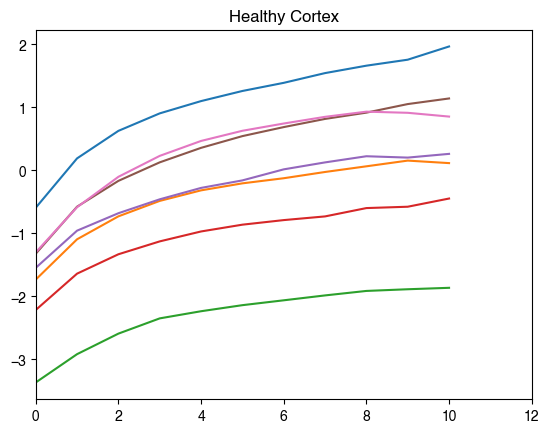

In [128]:
for file in list_msd_healthy_cortex:
    plt.plot(file[1:12])
plt.xlim(0, 12)
plt.title('Healthy Cortex')

Text(0.5, 1.0, 'OGD Cortex')

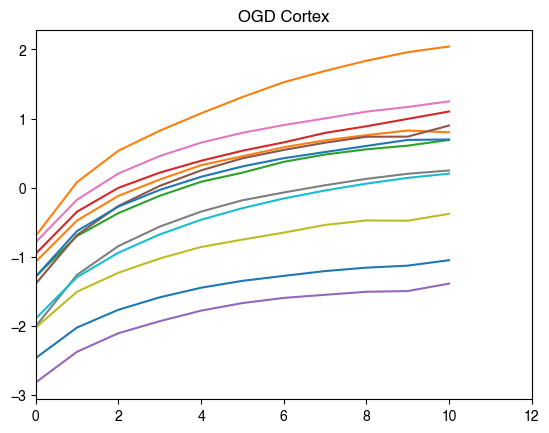

In [129]:
for file in list_msd_ogd_cortex:
    plt.plot(file[1:12])
plt.xlim(0, 12)
plt.title('OGD Cortex')

Text(0.5, 1.0, 'Healthy Striatum')

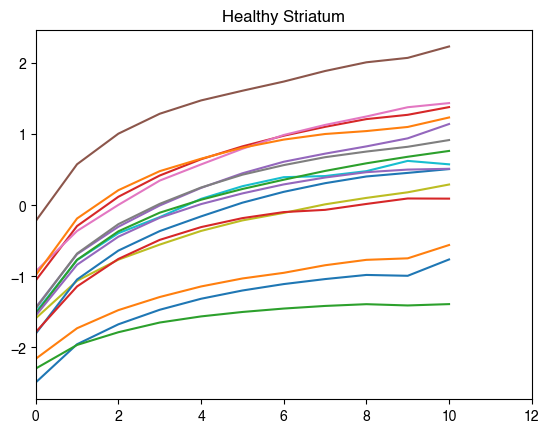

In [130]:
for file in list_msd_healthy_striatum:
    plt.plot(file[1:12])
plt.xlim(0, 12)
plt.title('Healthy Striatum')

Text(0.5, 1.0, 'OGD Striatum')

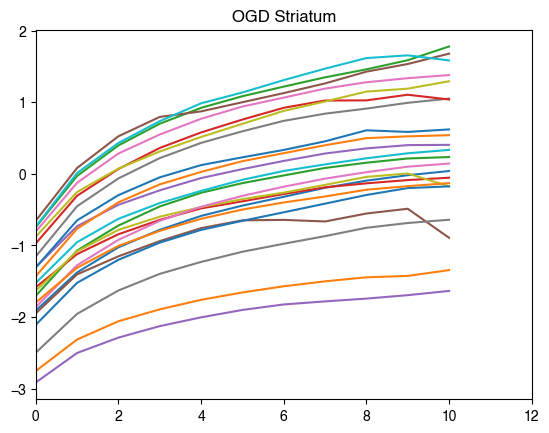

In [131]:
for file in list_msd_ogd_striatum:
    plt.plot(file[1:12])
plt.xlim(0, 12)
plt.title('OGD Striatum')

In [9]:
healthy_cortex_geo_means, healthy_cortex_geo_sems = get_mean_geo_data(msd_healthy_cortex, filepath=phuong_data_path + '/Healthy_QD-BEV/cortex/')

In [10]:
ogd_cortex_geo_means, ogd_cortex_geo_sems = get_mean_geo_data(msd_ogd_cortex, filepath=phuong_data_path + '/OGD_QD-BEV/cortex/')

In [11]:
healthy_striatum_geo_means, healthy_striatum_geo_sems = get_mean_geo_data(msd_healthy_striatum, filepath=phuong_data_path + '/Healthy_QD-BEV/striatum/')

In [12]:
ogd_striatum_geo_means, ogd_striatum_geo_sems = get_mean_geo_data(msd_ogd_striatum, filepath=phuong_data_path + '/OGD_QD-BEV/striatum/')

In [13]:
cortex_geo_mean_df = pd.DataFrame({'healthy_cortex': healthy_cortex_geo_means, 'ogd_cortex': ogd_cortex_geo_means})
cortex_geo_sem_df = pd.DataFrame({'healthy_cortex': healthy_cortex_geo_sems, 'ogd_cortex': ogd_cortex_geo_sems})
striatum_geo_mean_df = pd.DataFrame({'healthy_striatum': healthy_striatum_geo_means, 'ogd_striatum': ogd_striatum_geo_means})
striatum_geo_sem_df = pd.DataFrame({'healthy_striatum': healthy_striatum_geo_sems, 'ogd_striatum': ogd_striatum_geo_sems})

In [14]:
full_geomean_df = pd.concat([cortex_geo_mean_df, striatum_geo_mean_df], axis=1)
print(len(full_geomean_df))
full_geosem_df = pd.concat([cortex_geo_sem_df, striatum_geo_sem_df], axis=1)
print(len(full_geosem_df))

651
651


In [15]:
tau = cortex_geo_mean_df.index.values/651
tau

array([0.        , 0.0015361 , 0.0030722 , 0.00460829, 0.00614439,
       0.00768049, 0.00921659, 0.01075269, 0.01228879, 0.01382488,
       0.01536098, 0.01689708, 0.01843318, 0.01996928, 0.02150538,
       0.02304147, 0.02457757, 0.02611367, 0.02764977, 0.02918587,
       0.03072197, 0.03225806, 0.03379416, 0.03533026, 0.03686636,
       0.03840246, 0.03993856, 0.04147465, 0.04301075, 0.04454685,
       0.04608295, 0.04761905, 0.04915515, 0.05069124, 0.05222734,
       0.05376344, 0.05529954, 0.05683564, 0.05837174, 0.05990783,
       0.06144393, 0.06298003, 0.06451613, 0.06605223, 0.06758833,
       0.06912442, 0.07066052, 0.07219662, 0.07373272, 0.07526882,
       0.07680492, 0.07834101, 0.07987711, 0.08141321, 0.08294931,
       0.08448541, 0.08602151, 0.0875576 , 0.0890937 , 0.0906298 ,
       0.0921659 , 0.093702  , 0.0952381 , 0.09677419, 0.09831029,
       0.09984639, 0.10138249, 0.10291859, 0.10445469, 0.10599078,
       0.10752688, 0.10906298, 0.11059908, 0.11213518, 0.11367

In [24]:
def plot_msd_vs_tau(full_geomean_df, tau, column_names, data_range=(0,20), scale_func=None):
    """
    Plot data with flexible scaling and variable data range.

    Parameters:
    - full_geomean_df: DataFrame containing the data.
    - tau: The x-axis values for the plot.
    - column_names: List of strings, names of the columns in full_geomean_df to plot.
    - num_points: Integer, how many of the first data points to plot. Defaults to 20.
    - scale_func: Function to scale the data. Defaults to np.exp.
    """
    fig = plt.figure()
    if scale_func is not None:
        for column_name in column_names:
            plt.plot(tau[data_range[0]:data_range[1]], 
                     scale_func(full_geomean_df[column_name][data_range[0]:data_range[1]]), label=column_name)
    else:
        for column_name in column_names:
            plt.plot(tau[data_range[0]:data_range[1]], 
                     full_geomean_df[column_name][data_range[0]:data_range[1]], label=column_name)
    
    plt.legend()
    #plt.show()
    return fig

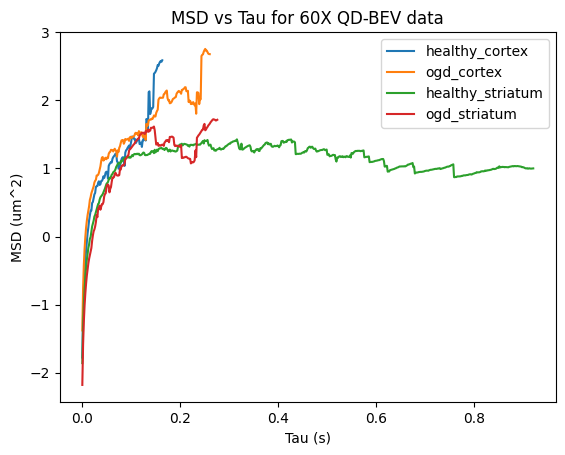

In [27]:
fig = plot_msd_vs_tau(full_geomean_df, tau, ['healthy_cortex', 'ogd_cortex', 'healthy_striatum', 'ogd_striatum'], data_range=(0,600), scale_func=None)
plt.title('MSD vs Tau for 60X QD-BEV data')
plt.ylabel('MSD (um^2)')
plt.xlabel('Tau (s)')
plt.show()

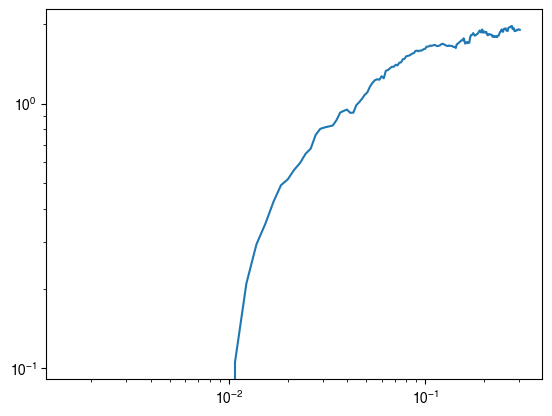

In [139]:
plt.loglog(tau[1:], full_geomean_df['ogd_cortex'][1:], label='healthy_cortex')


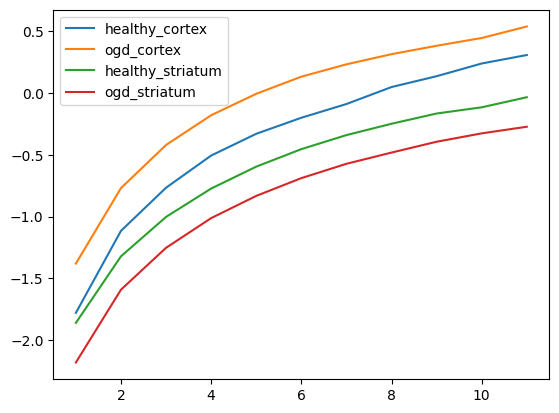

In [26]:
plt.plot(full_geomean_df['healthy_cortex'][0:12], label='healthy_cortex')
plt.plot(full_geomean_df['ogd_cortex'][0:12], label='ogd_cortex')
plt.plot(full_geomean_df['healthy_striatum'][0:12], label='healthy_striatum')
plt.plot(full_geomean_df['ogd_striatum'][0:12], label='ogd_striatum')
plt.legend()


In [155]:
def testing_msd_viz(doses,geomean_df,geosem_df,fps):
    """
    Visualize MSD data from diffusivity experiments.
    
    Parameters
    ----------
        doses (list):
            List of doses used in the experiment.
        geomean_df (pandas.DataFrame):
            DataFrame containing the mean-squared displacement data.
        geosem_df (pandas.DataFrame):
            DataFrame containing the standard error of the mean-squared displacement data.
        fps (int):
            Frames per second of the experiment.

    Returns
    -------
        fig (matplotlib.figure.Figure):
            Figure containing the MSD data.

    """
    count=0
    msd_dose_list=diff_utils.get_df_dose_list(doses,geomean_df)
    sem_dose_list=diff_utils.get_df_dose_list(doses,geosem_df)
    
    if len(doses)==1:
        tau=geomean_df.index.values/651
        fig,ax=plt.subplots(figsize=(6,6))
        plt.rcParams.update({'font.family':'helvetica'})
        handles=list(geomean_df.columns)
        #print('tau',tau)
        print('geomean_df[handle]', geomean_df[handles[0]]/2)#+geosem_df[handles[0]]/2)
        #print('geosem_df[handle]',geosem_df[handle])
    
        for handle in handles:
            ax.loglog(tau,geomean_df[handle])
            ax.set_xlabel('Lag time (s)',fontsize=16)
            ax.set_ylabel('Mean-squared displacement (μ$m^2$)',fontsize=16)
            
            
            ax.fill_between(tau,geomean_df[handle]+geosem_df[handle]/2,geomean_df[handle]-geosem_df[handle]/2,cmap='ocean',alpha=0.2)
            #ax.legend(handles,loc='best')
            #ax.set_xlim([0.008, 0.2])
            #ax.set_ylim([0.008,1])
            #ax.set_title(f'\n{doses[c]}\n', fontsize=16)
         
    else:                
        tau=geomean_df.index.values/651
        #fig,axes=plt.subplots(nrows=1,ncols=len(doses),figsize=(len(doses)*6,6))
        fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(len(doses)*6,6))
        plt.rcParams.update({'font.family':'helvetica'})
        count=0
        
        for c in np.arange(0,len(doses)):
            while count<=c:
                sem_handles = list(sem_dose_list[c].columns)
                msd_handles = list(msd_dose_list[c].columns)
                print(msd_dose_list[count].values.flatten().shape)
                #print(msd_dose_list[count]+sem_dose_list[count]/2)
                axes.loglog(tau,msd_dose_list[count], label=doses[c])
                axes.fill_between(tau,
                                    (msd_dose_list[count]+sem_dose_list[count]/2).values.flatten(),
                                    (msd_dose_list[count]-sem_dose_list[count]/2).values.flatten(),
                                    cmap='ocean',
                                    alpha=0.2)
                axes.set_xlabel('\nLag time (s)',fontsize=16)               
                

                #axes[c].set_xlim([0.008, 1])
                #axes[c].set_ylim([0.008,1])
                axes.set_title(f'\n{doses[c]}\n', fontsize=16)
    
                if c == 0:
                    axes.set_ylabel('Mean-squared displacement (μ$m^2$)',fontsize=16)
    
                count+=1
                axes.legend(loc='best')
    return fig

TypeError: 'list' object is not callable

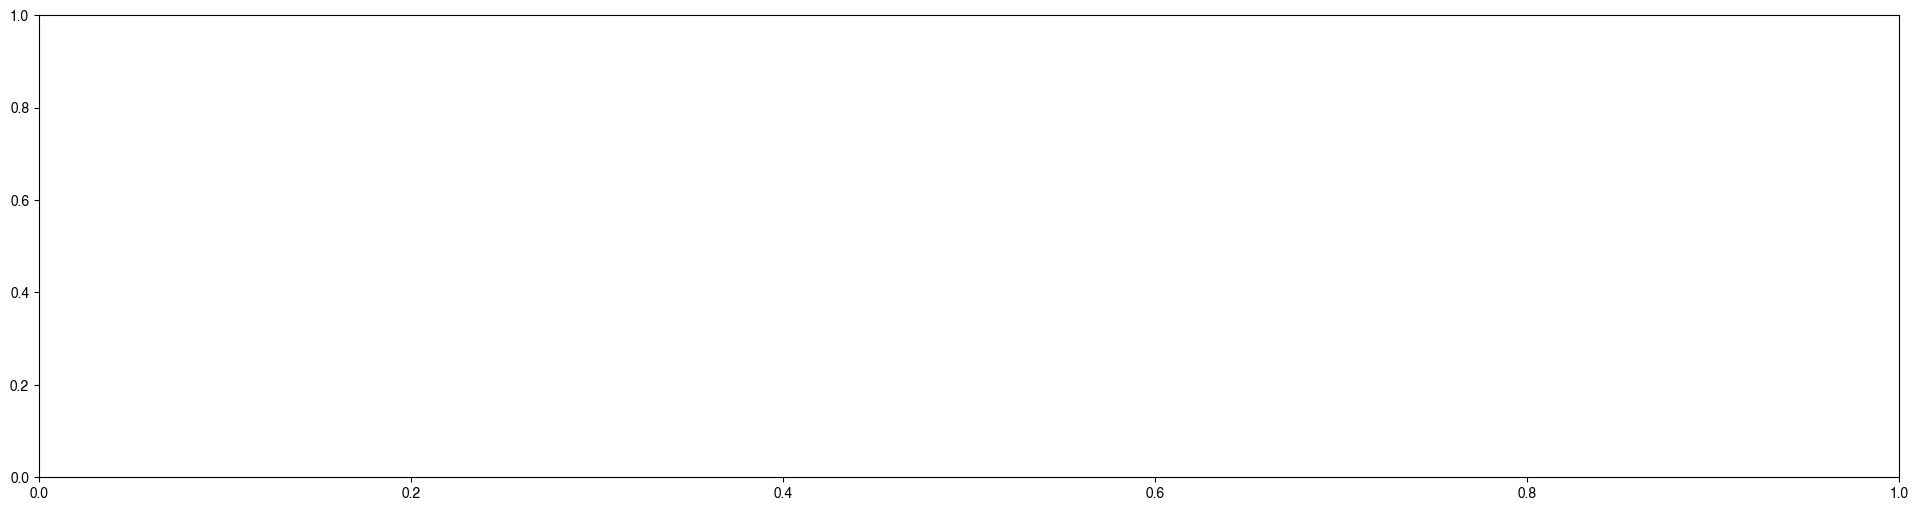

In [156]:
fig = testing_msd_viz(['healthy_cortex', 'ogd_cortex', 'healthy_striatum', 'ogd_striatum'], geomean_df=full_geomean_df, geosem_df=full_geosem_df, fps=100)

In [163]:
def msd_viz(doses,geomean_df,df_dose_list):
    count = 0
    
    # if len(doses) == 1:
    #     tau = geomean_df.index.values / 651
    #     fig, ax = plt.subplots(figsize=(5,5))
    #     plt.rcParams.update({'font.family':'helvetica'})
    #     handles = list(geomean_df.columns)
    #     #labels = [handle.split(stimulus+'_')[1] for handle in handles] # this wont work
    
    #     for handle in handles:
    #         ax.loglog(tau [0:70],geomean_df[handle][0:70]) #Can take out the 0:70 part to get the whole graph
    #         ax.set_xlabel('Lag time (s)',fontsize=16)
    #         ax.set_ylabel('Mean-squared displacement (μ$m^2$)',fontsize=16)
    #         #ax.legend(labels,loc='upper left') #this wont either
    #         ax.set_xlim([0.002, 0.05])
    #         ax.set_ylim([0.0009,1.3])
    #         #axes[c].set_title(f'\n{doses[c]}\n', fontsize=16)
    #     ax.legend(handles)

         
   # else:                
    tau = geomean_df.index.values/651
    fig, axes = plt.subplots(nrows=1, ncols=len(doses),figsize=(12,6))
    plt.rcParams.update({'font.family':'helvetica'})
    count=0
    
    for c in np.arange(0,len(doses)):
        handles = list(df_dose_list[c].columns)
        times = []
        handles = list(df_dose_list[c].columns)
        #labels = [handle.split(stimulus+'_')[1] for handle in handles]
        axes[c].loglog(tau[0:70],df_dose_list[count][0:70])
        axes[c].set_xlabel('\nLag time (s)',fontsize=16)
        #axes[c].legend(labels,loc='best')
        axes[c].set_xlim([0.002, 0.02])
        axes[c].set_ylim([0.0009,10])
        axes[c].set_title(f'\n{doses[c]}\n', fontsize=16)

        if c == 0:
            axes[c].set_ylabel('Mean-squared displacement (μ$m^2$)',fontsize=16)

        count+=1
    return

In [164]:
def get_df_dose_list(doses,geo_df):
    df_dose_list = []
    
    for dose in doses:
        dose_df = pd.DataFrame()
        dose_cols = [col for col in geo_df.columns if dose in col]
        dose_df = geo_df.filter(dose_cols, axis=1)
        df_dose_list.append(dose_df)
        
    return df_dose_list

In [165]:
df_dose_list = get_df_dose_list(['healthy_cortex', 'ogd_cortex', 'healthy_striatum', 'ogd_striatum'], full_geomean_df)

In [ ]:
msd_viz(doses=['healthy_cortex', 'ogd_cortex', 'healthy_striatum', 'ogd_striatum'], geomean_df=full_geomean_df, df_dose_list=df_dose_list)

## Lets plot MSD plots for each video!

#### First, healthy cortex

In [ ]:
for file in msd_healthy_cortex:
    fig = msd.plot_individual_msds(df=pd.read_csv(phuong_data_path + '/Healthy_QD-BEV/cortex/' + file), x_range=1, y_range=20, title='Healthy Cortex: '+ file[:-4])
    fig.savefig('/Users/nelsschimek/Documents/nancelab/diff_viz/output/' + 'Healthy_Cortex_' + file[:-4] + '_msd_plot.png')

In [ ]:
for file in msd_ogd_cortex:
    fig = msd.plot_individual_msds(df=pd.read_csv(phuong_data_path + '/OGD_QD-BEV/cortex/' + file), x_range=1, y_range=20, title='OGD Cortex: '+ file[:-4])
    fig.savefig('/Users/nelsschimek/Documents/nancelab/diff_viz/output/' + 'OGD_Cortex_' + file[:-4] + '_msd_plot.png')

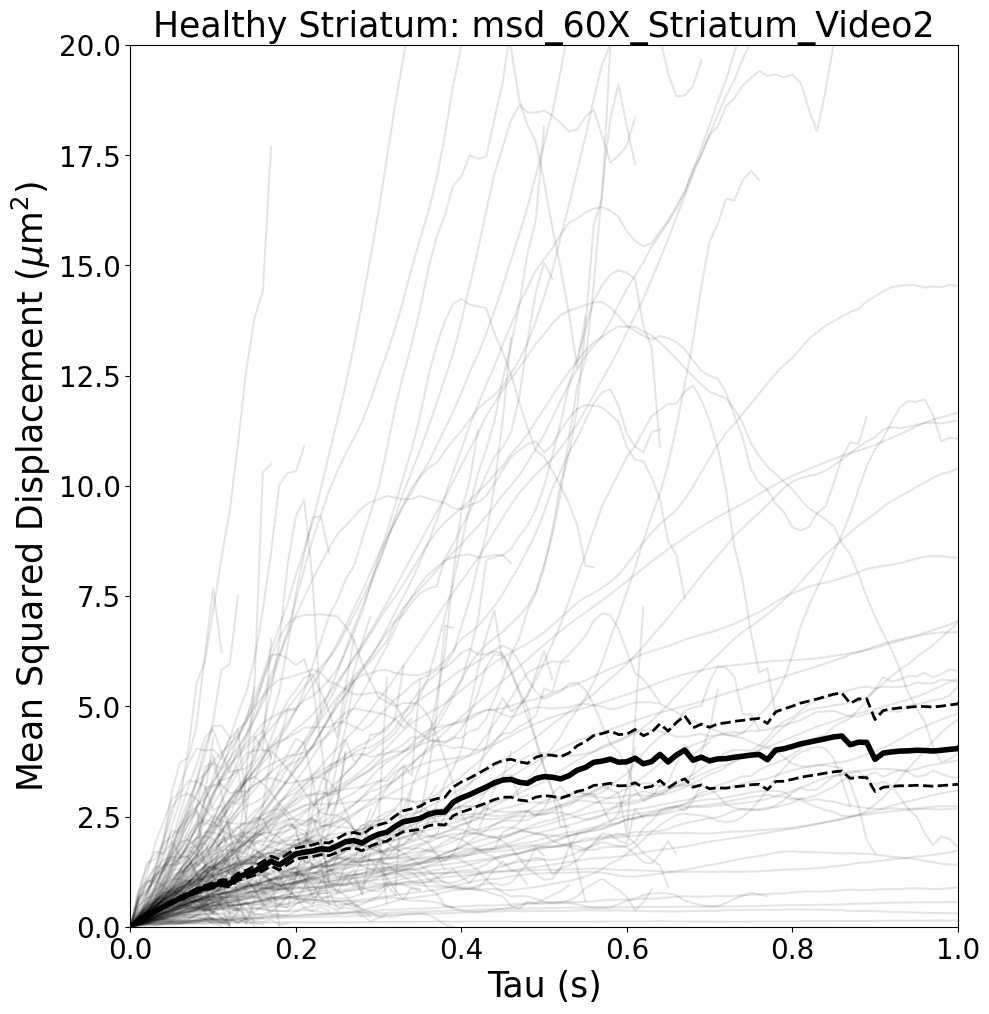

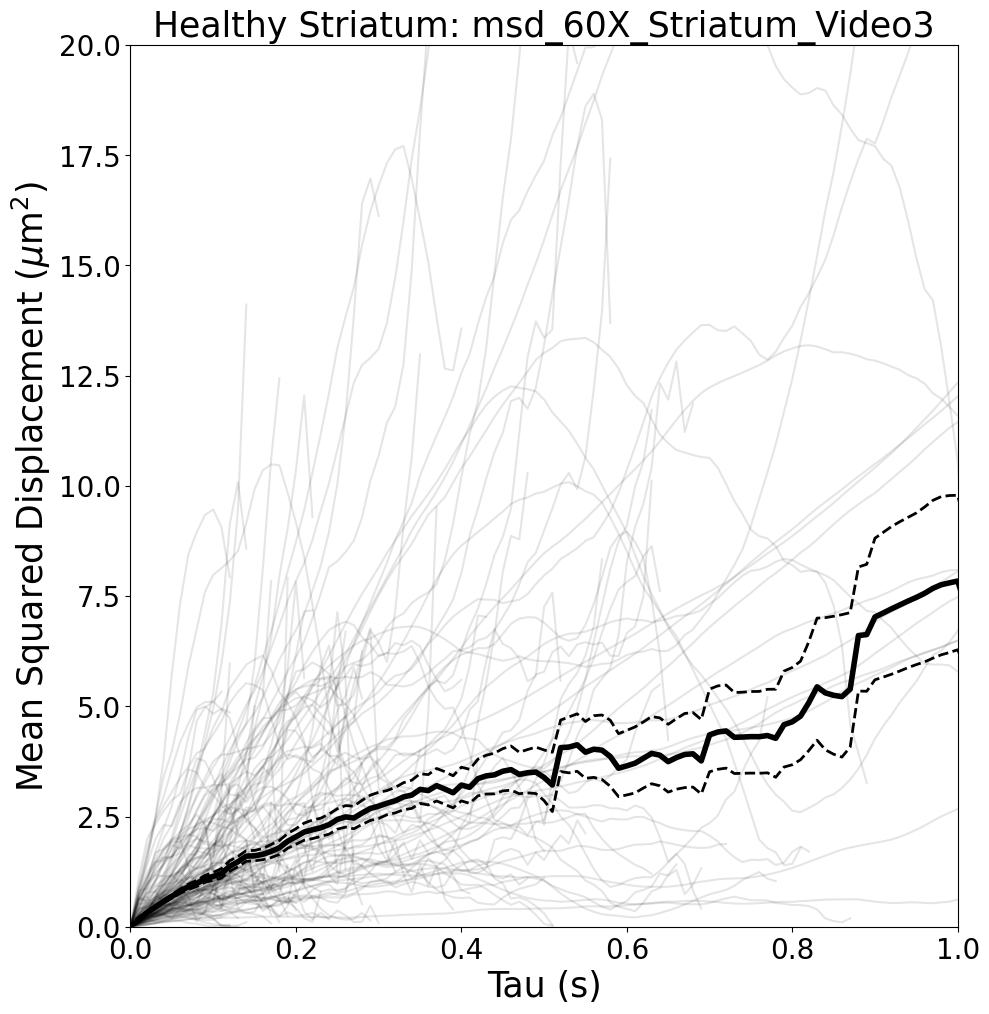

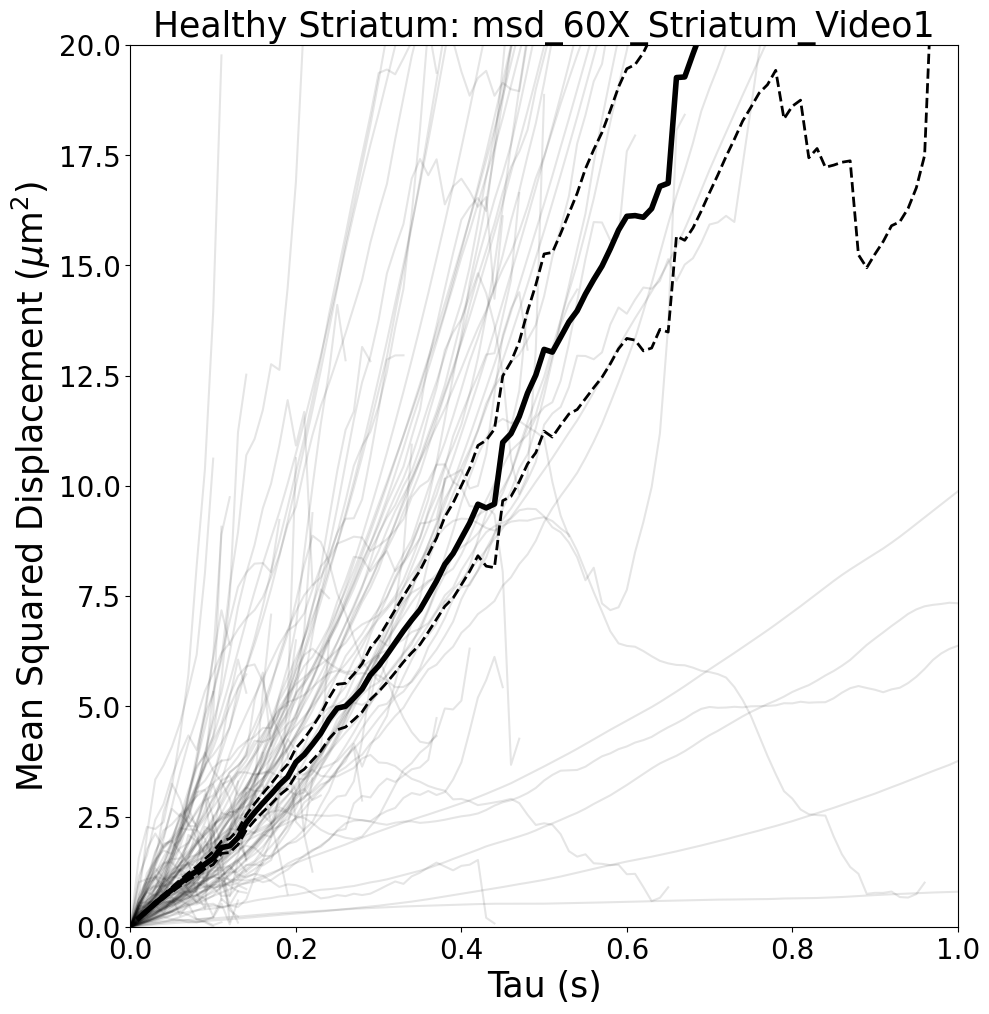

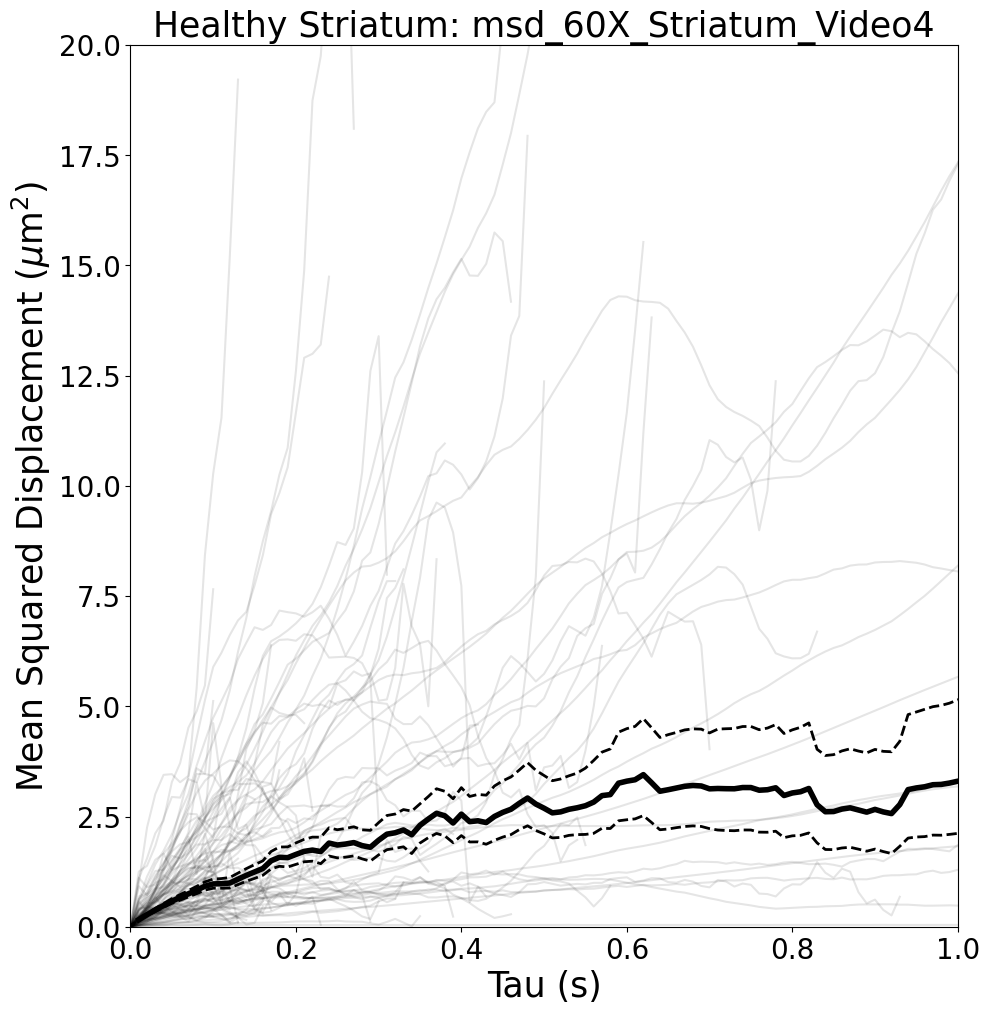

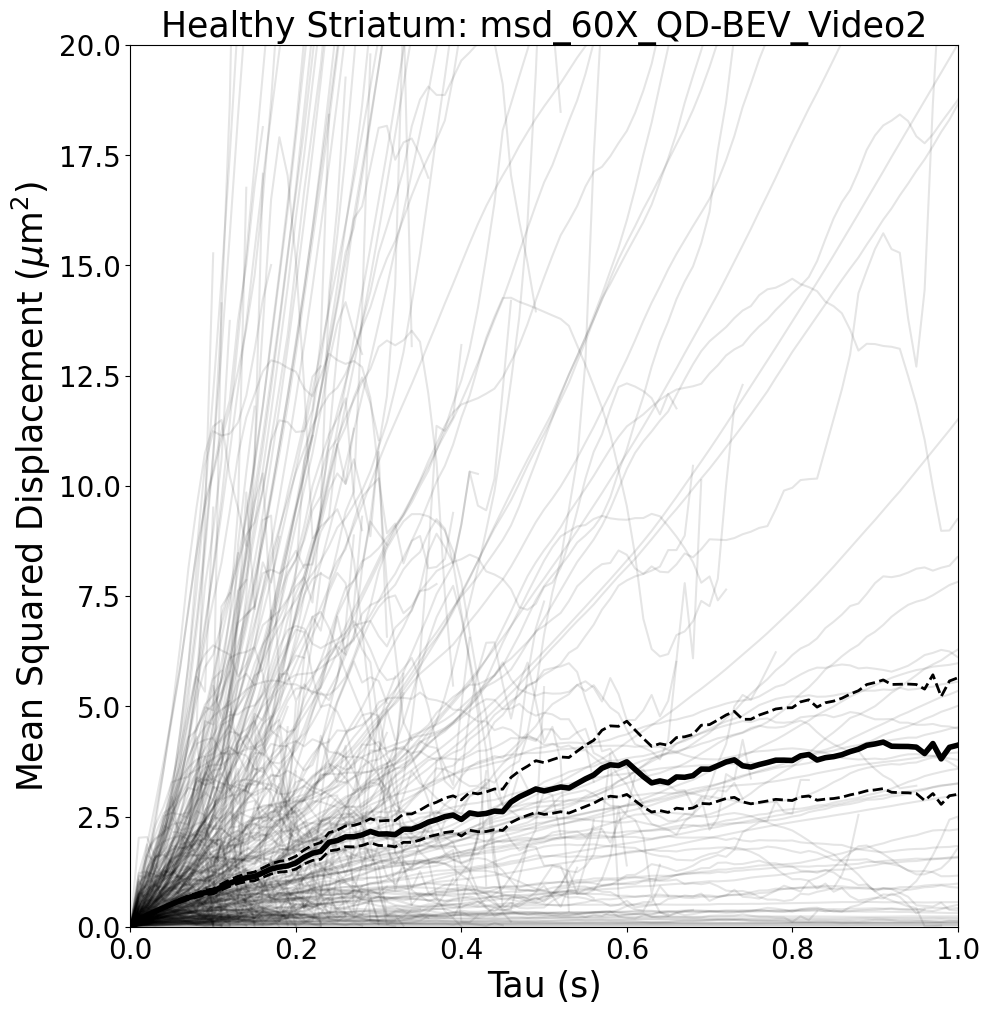

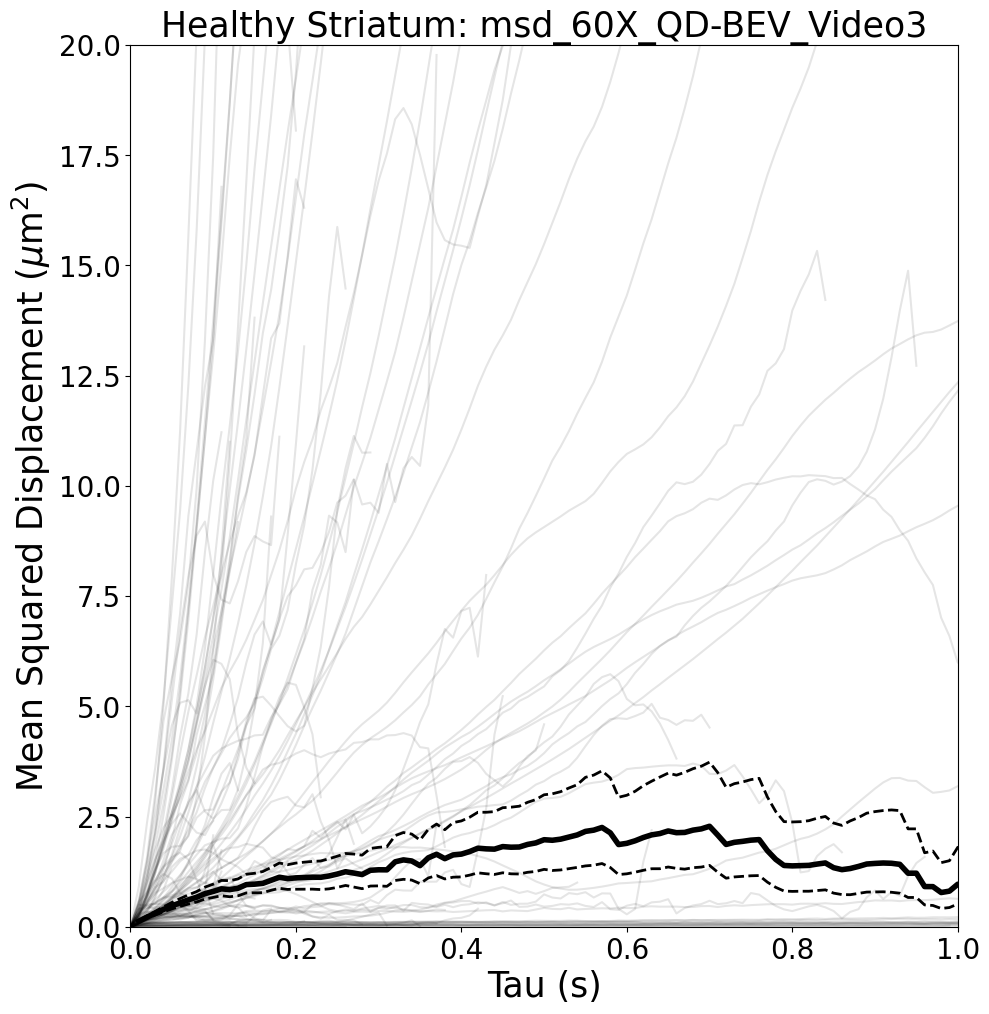

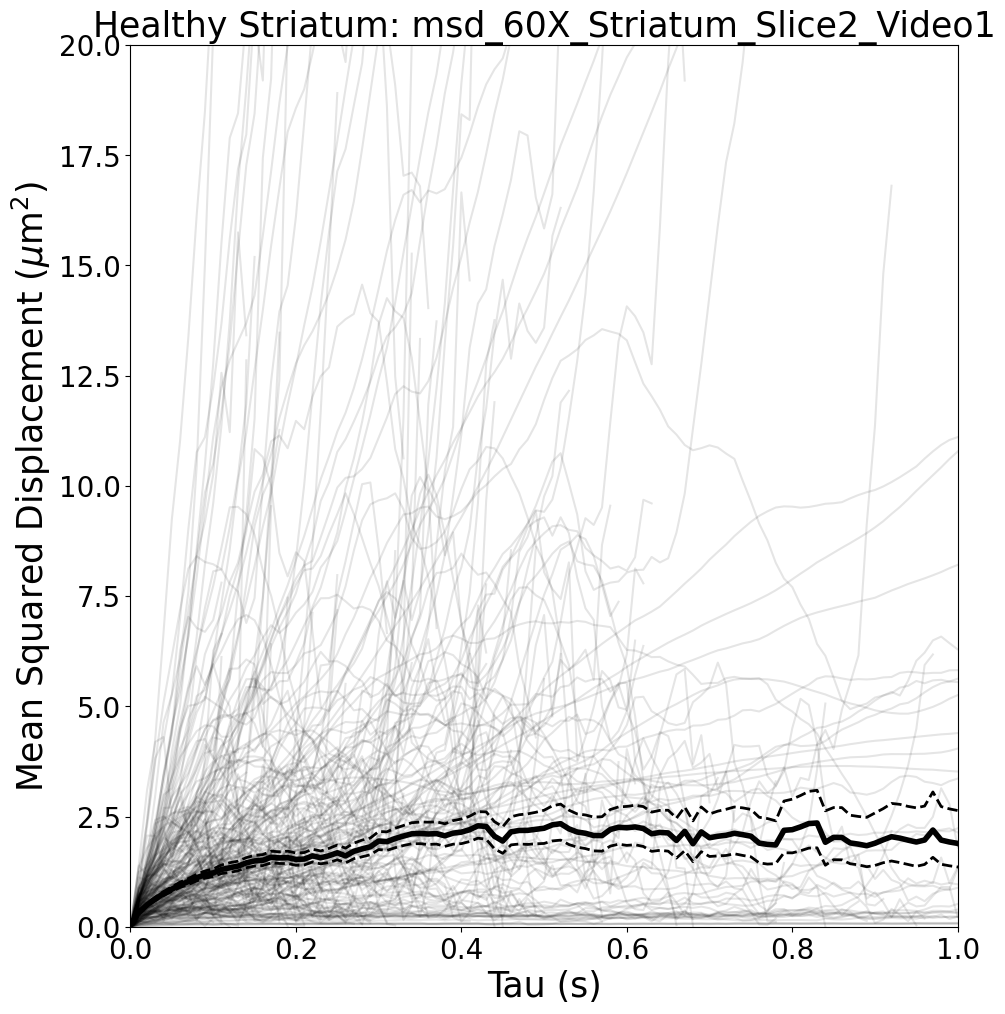

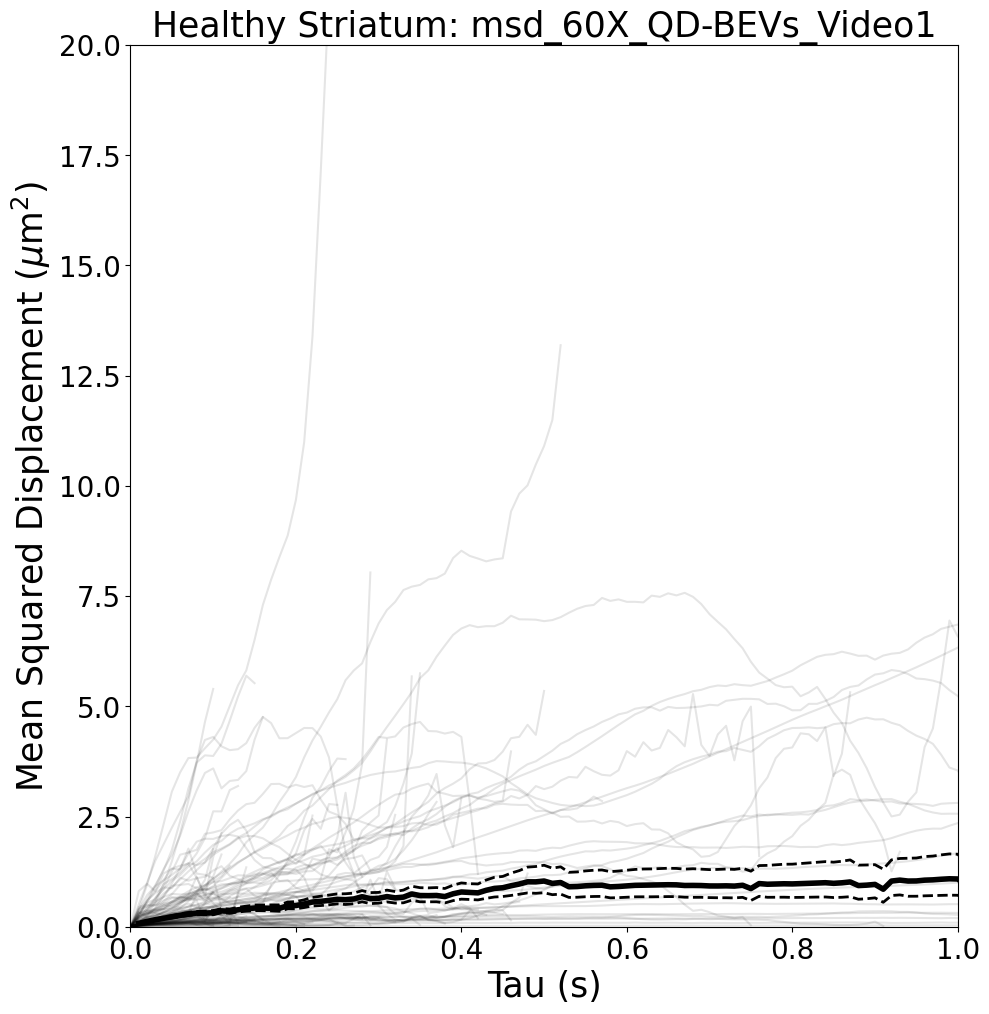

In [36]:
for file in msd_healthy_striatum:
    fig = msd.plot_individual_msds(df=pd.read_csv(phuong_data_path + '/Healthy_QD-BEV/striatum/' + file), x_range=1, y_range=20, title='Healthy Striatum: '+ file[:-4])
    fig.savefig('/Users/nelsschimek/Documents/nancelab/diff_viz/output/' + 'Healthy_Striatum_' + file[:-4] + '_msd_plot.png')

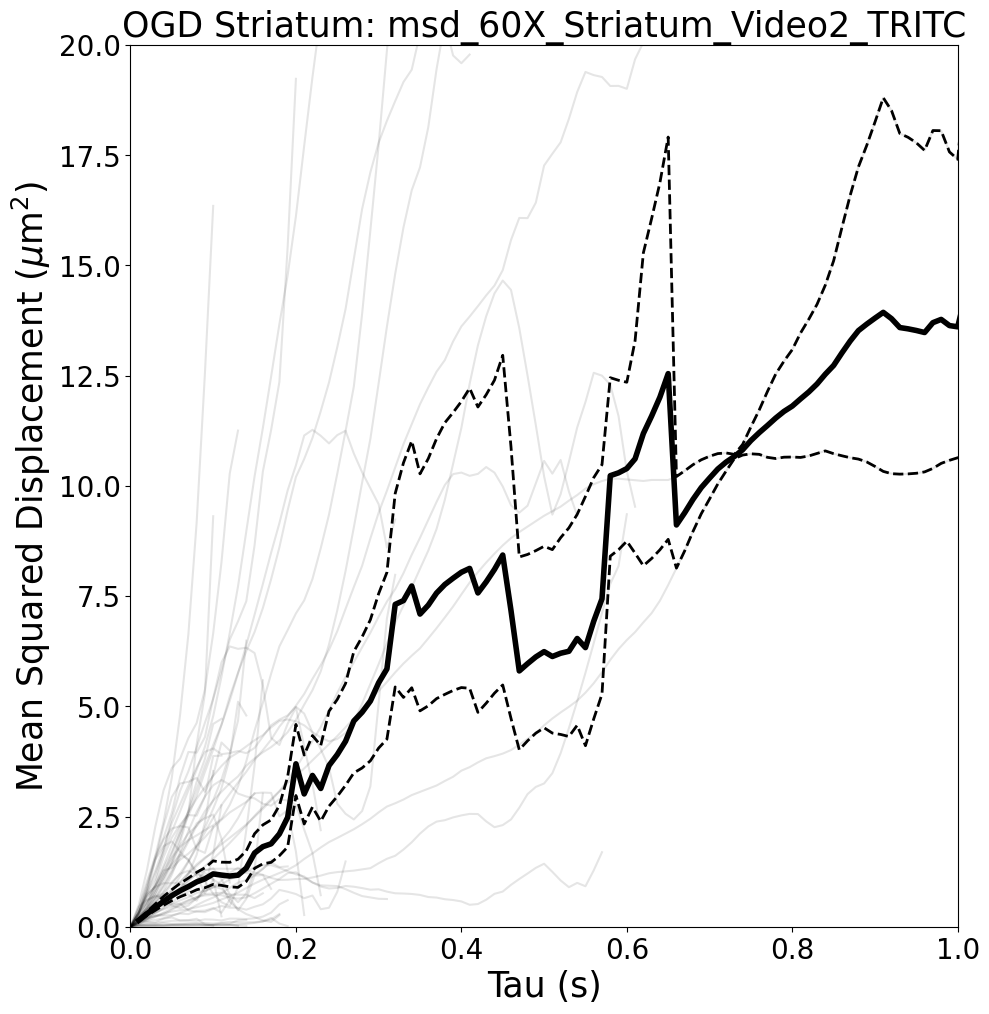

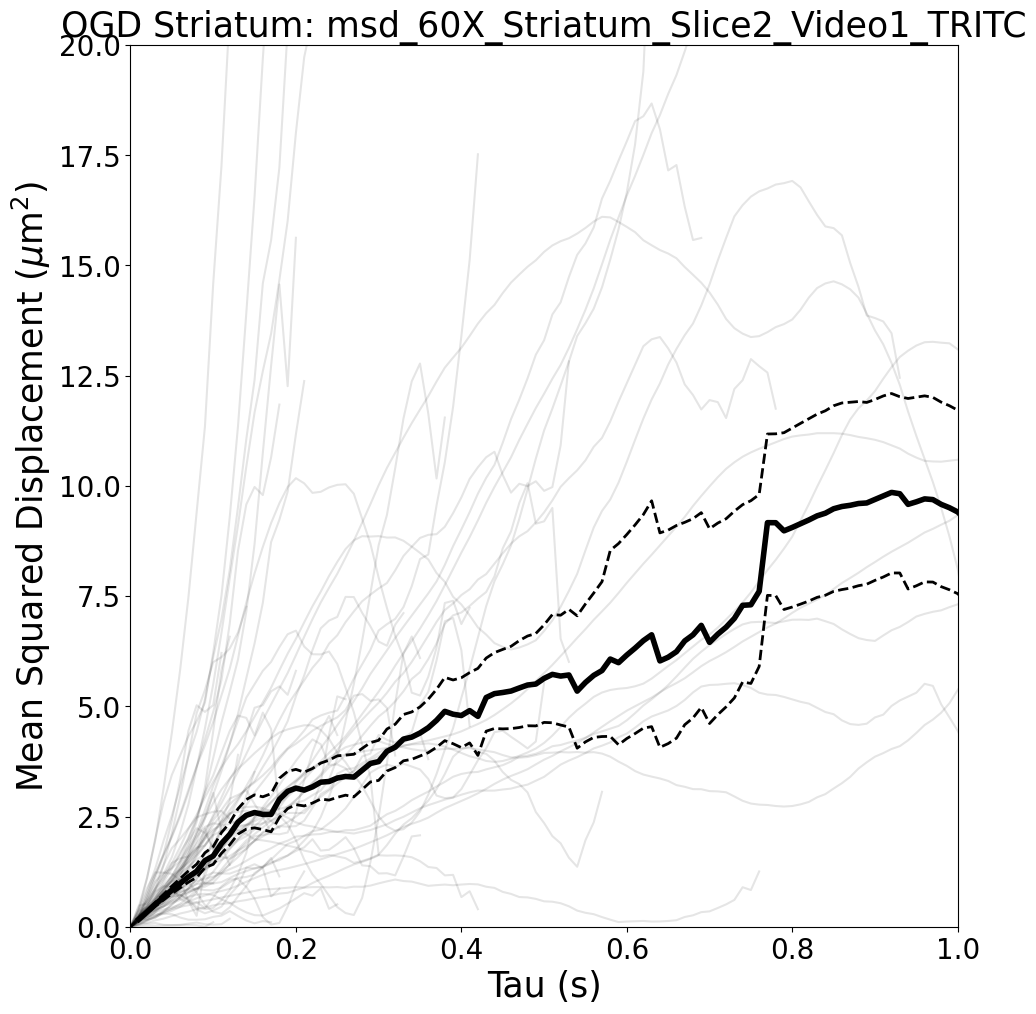

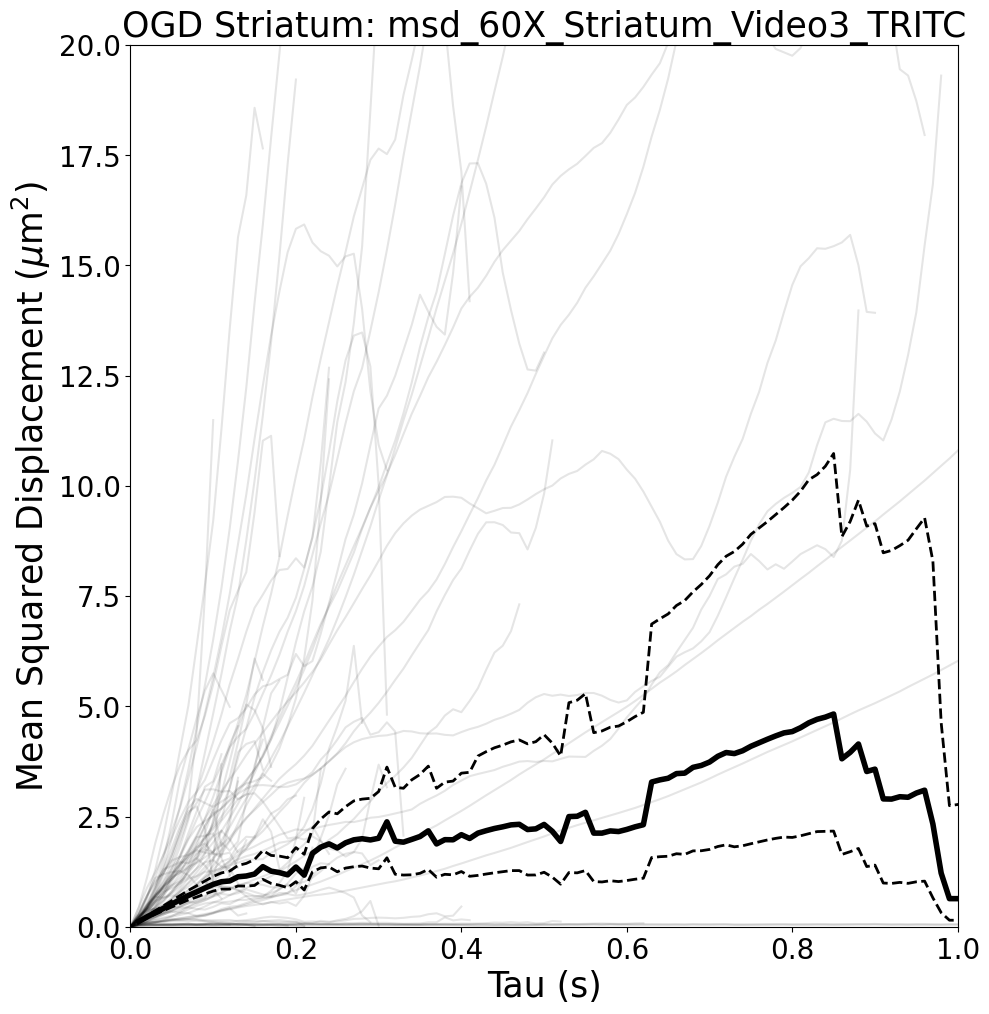

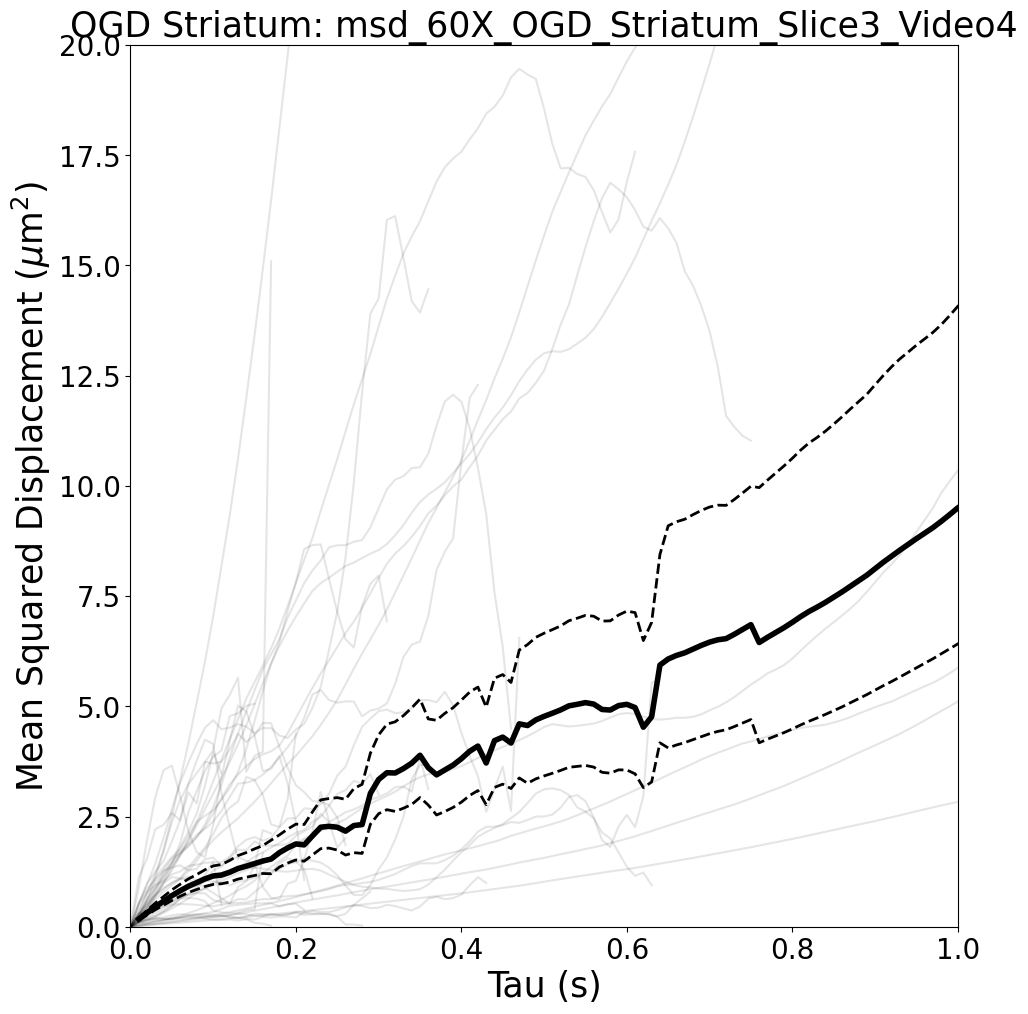

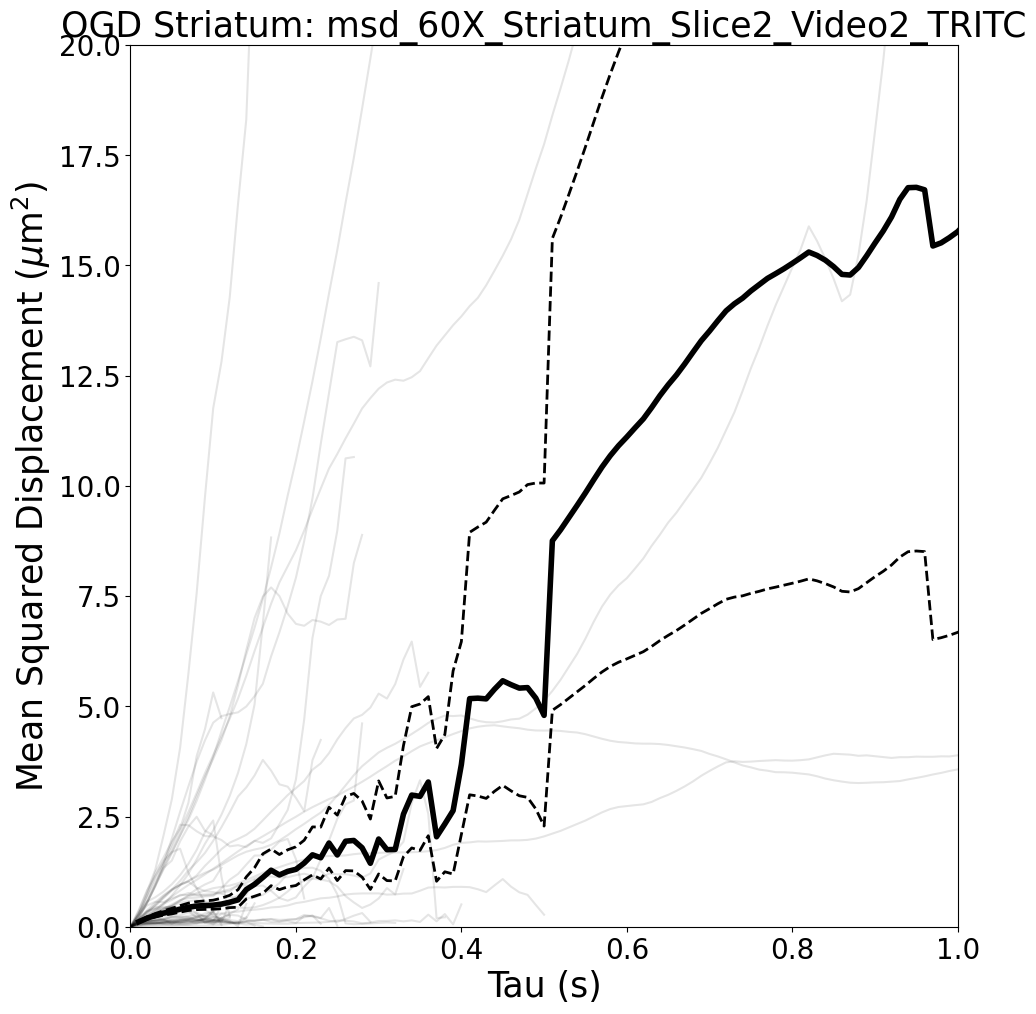

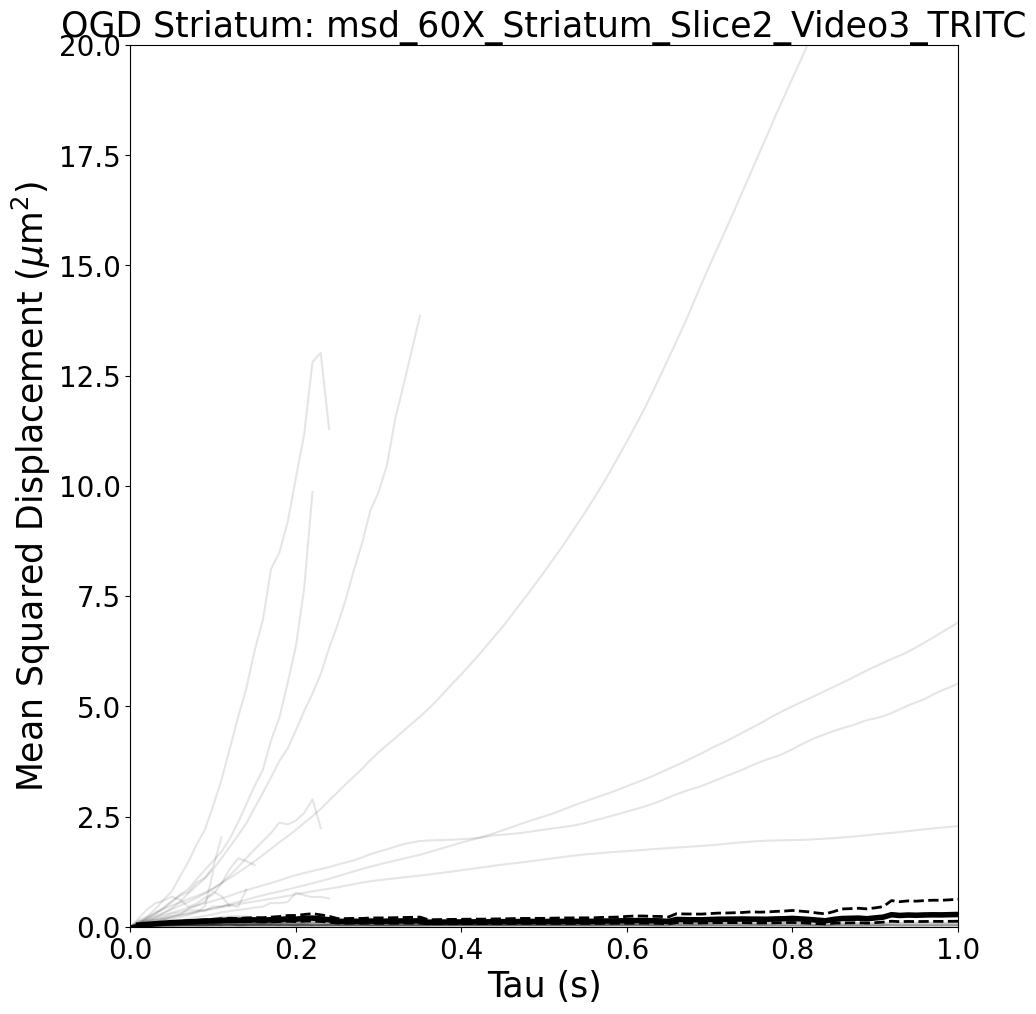

In [37]:
for file in msd_ogd_striatum:
    fig = msd.plot_individual_msds(df=pd.read_csv(phuong_data_path + '/OGD_QD-BEV/striatum/' + file), x_range=1, y_range=20, title='OGD Striatum: '+ file[:-4])
    fig.savefig('/Users/nelsschimek/Documents/nancelab/diff_viz/output/' + 'OGD_Striatum_' + file[:-4] + '_msd_plot.png')

# Features analysis

In [10]:
features_healthy_cortex = [file for file in healthy_files_cortex if 'features_60' in file]
features_ogd_cortex = [file for file in ogd_files_cortex if 'features_60' in file]
print(len(features_healthy_cortex))
print(len(features_ogd_cortex))

features_healthy_striatum = [file for file in healthy_files_striatum if 'features_60' in file]
features_ogd_striatum = [file for file in ogd_files_striatum if 'features_60' in file]
print(len(features_healthy_striatum))
print(len(features_ogd_striatum))

2
4
8
6


In [11]:
list_features_healthy_cortex = []
list_features_ogd_cortex = []
list_features_healthy_striatum = []
list_features_ogd_striatum = []

for file in features_healthy_cortex:
    feature_data = pd.read_csv(phuong_data_path + '/Healthy_QD-BEV/cortex/' + file)
    list_features_healthy_cortex.append(feature_data)

   

for file in features_ogd_cortex:
    feature_data = pd.read_csv(phuong_data_path + '/OGD_QD-BEV/cortex/' + file)
    list_features_ogd_cortex.append(feature_data)
  

for file in features_healthy_striatum:
    feature_data = pd.read_csv(phuong_data_path + '/Healthy_QD-BEV/striatum/' + file)
    list_features_healthy_striatum.append(feature_data)
  

for file in features_ogd_striatum:
    feature_data = pd.read_csv(phuong_data_path + '/OGD_QD-BEV/striatum/' + file)
    list_features_ogd_striatum.append(feature_data)


In [12]:
all_features_healthy_cortex = pd.concat(list_features_healthy_cortex)
all_features_healthy_cortex['target'] = 'healthy_cortex'
all_features_ogd_cortex = pd.concat(list_features_ogd_cortex)
all_features_ogd_cortex['target'] = 'ogd_cortex'
all_features_healthy_striatum = pd.concat(list_features_healthy_striatum)
all_features_healthy_striatum['target'] = 'healthy_striatum'
all_features_ogd_striatum = pd.concat(list_features_ogd_striatum)
all_features_ogd_striatum['target'] = 'ogd_striatum'

all_features = pd.concat([all_features_healthy_cortex, all_features_ogd_cortex, all_features_healthy_striatum, all_features_ogd_striatum])
all_features.shape

(2250, 74)

In [13]:
feature_list = ['alpha', # Fitted anomalous diffusion alpha exponenet
    'D_fit', # Fitted anomalous diffusion coefficient
    'kurtosis', # Kurtosis of track
    'asymmetry1', # Asymmetry of trajecory (0 for circular symmetric, 1 for linear)
    'asymmetry2', # Ratio of the smaller to larger principal radius of gyration
    'asymmetry3', # An asymmetric feature that accnts for non-cylindrically symmetric pt distributions
    'AR', # Aspect ratio of long and short side of trajectory's minimum bounding rectangle
    'elongation', # Est. of amount of extension of trajectory from centroid
    'boundedness', # How much a particle with Deff is restricted by a circular confinement of radius r
    'fractal_dim', # Measure of how complicated a self similar figure is
    'trappedness', # Probability that a particle with Deff is trapped in a region
    'efficiency', # Ratio of squared net displacement to the sum of squared step lengths
    'straightness', # Ratio of net displacement to the sum of squared step lengths
    'MSD_ratio', # MSD ratio of the track
    'Deff1', # Effective diffusion coefficient at 0.33 s
    'Deff2', # Effective diffusion coefficient at 3.3 s
]

In [14]:
all_features_cleaned = all_features[~all_features[list(set(feature_list)-set(['Deff2', 'Mean Deff2']))].isin([np.inf, np.nan, -np.inf]).any(axis=1)]
all_features_cleaned.shape

(2193, 74)

In [15]:
all_features_cleaned[feature_list].max()

alpha           9.931631e+00
D_fit           7.176191e+01
kurtosis        3.983173e+01
asymmetry1      1.000000e+00
asymmetry2      9.816107e-01
asymmetry3      6.931472e-01
AR              1.970000e+16
elongation      1.000000e+00
boundedness     4.213953e-01
fractal_dim     4.409043e+00
trappedness    -1.040201e-01
efficiency      5.609156e+01
straightness    9.865446e-01
MSD_ratio       2.763908e+01
Deff1           3.310575e+01
Deff2           4.184603e+01
dtype: float64

Text(0.5, 1.0, 'Percenrage of Diffusion modes per Condition, 60x')

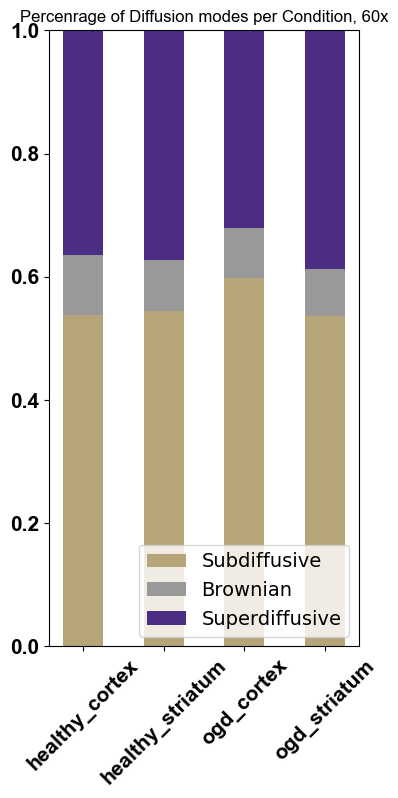

In [18]:
fig = diffusion_modes.plot_diffusion_modes(all_features_cleaned, 'target')
plt.xticks(rotation=45)
plt.title('Percenrage of Diffusion modes per Condition, 60x')

alpha
D_fit


kurtosis
asymmetry1
asymmetry2
asymmetry3
AR
elongation
boundedness
fractal_dim
trappedness
efficiency
straightness
MSD_ratio
Deff1
Deff2


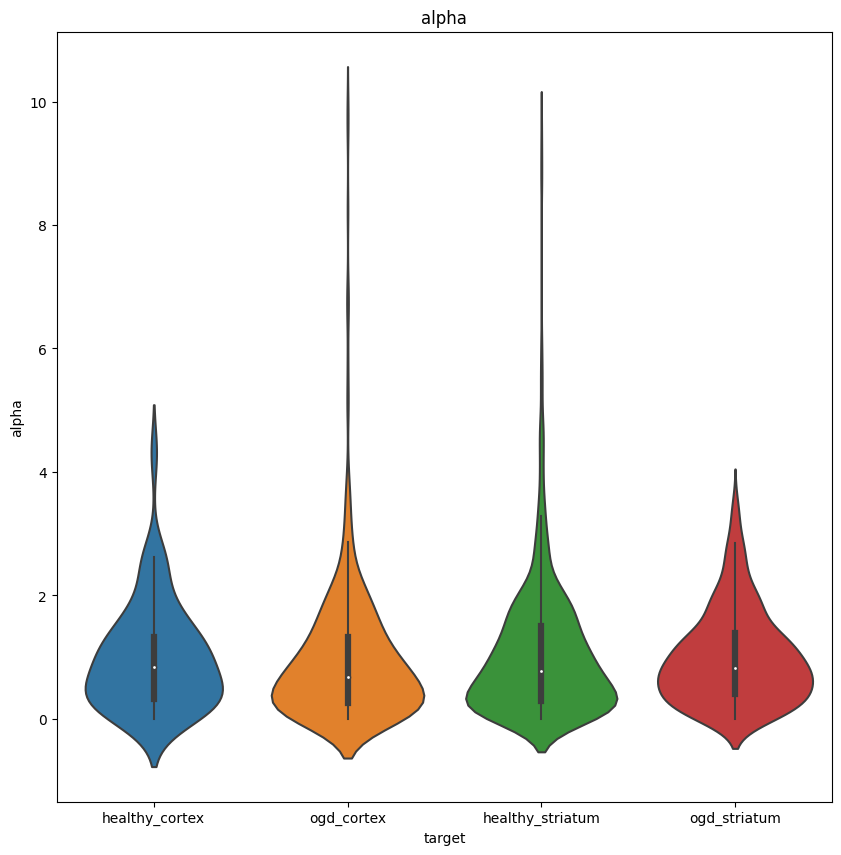

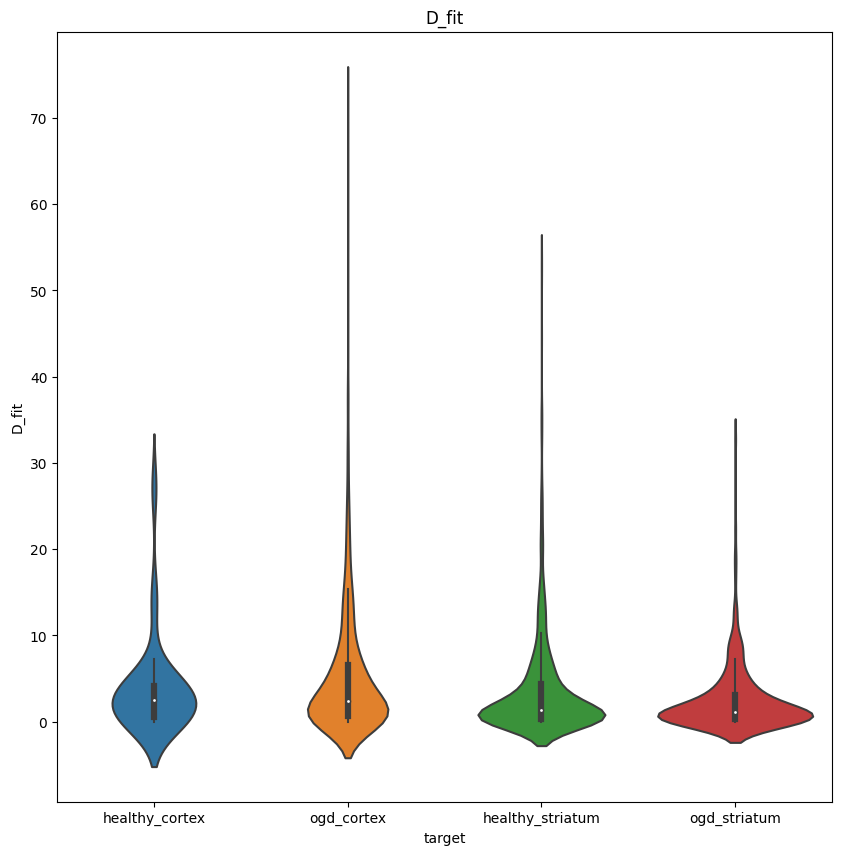

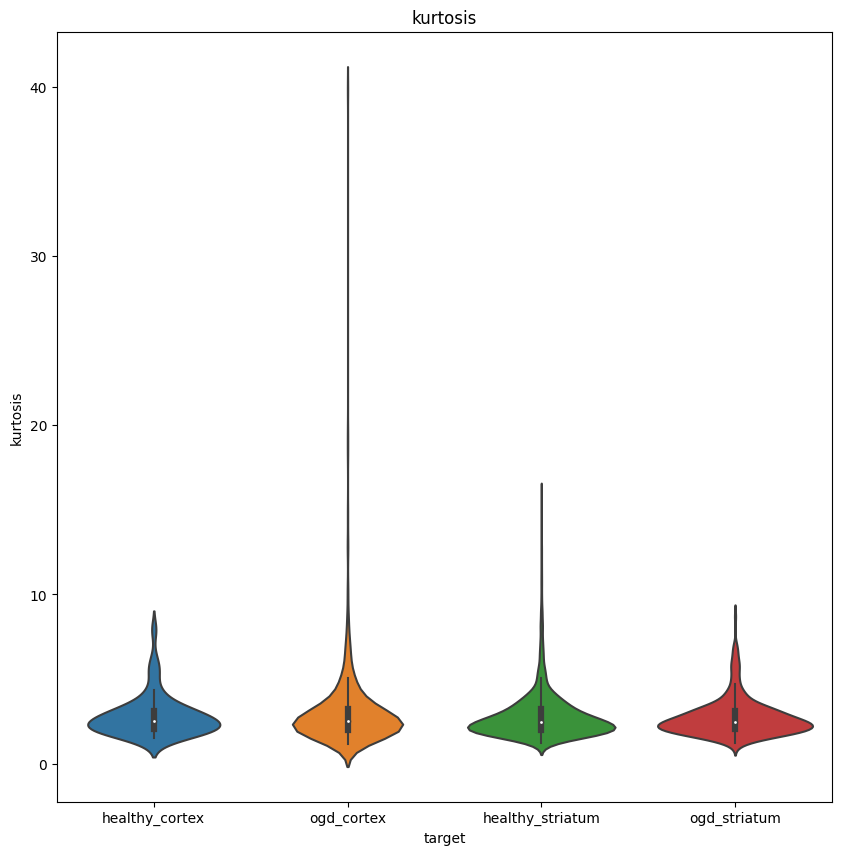

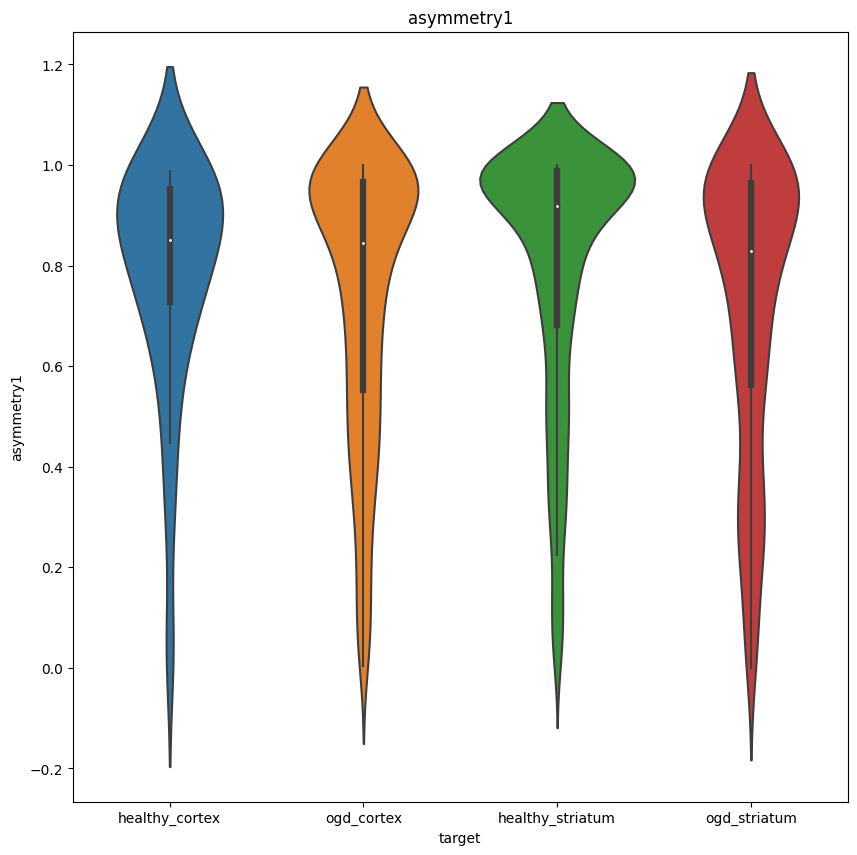

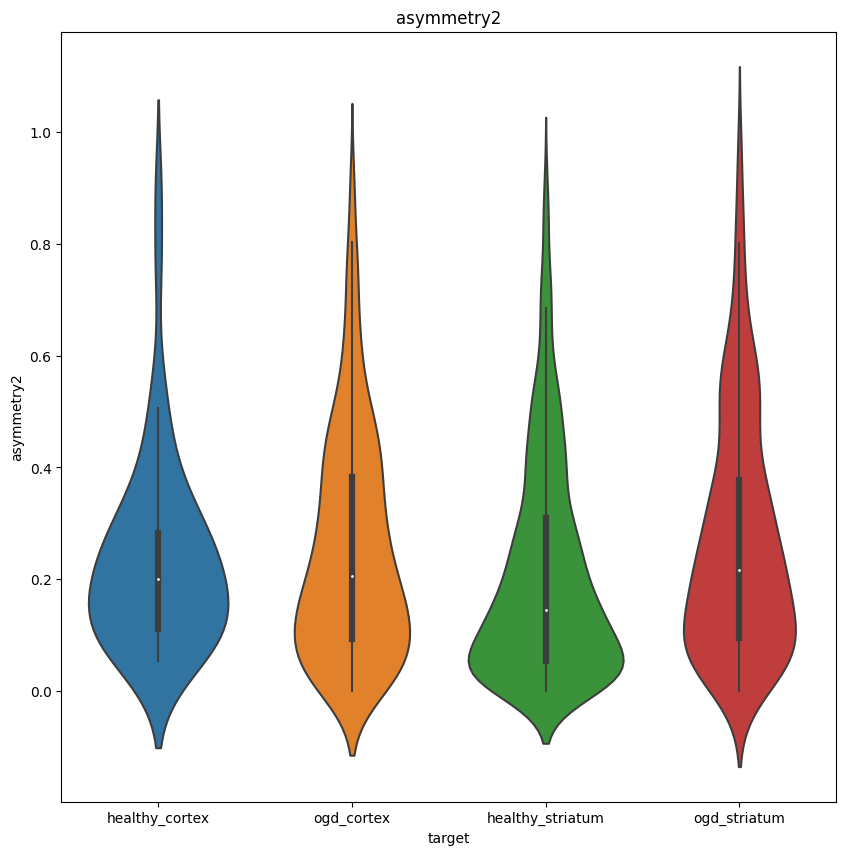

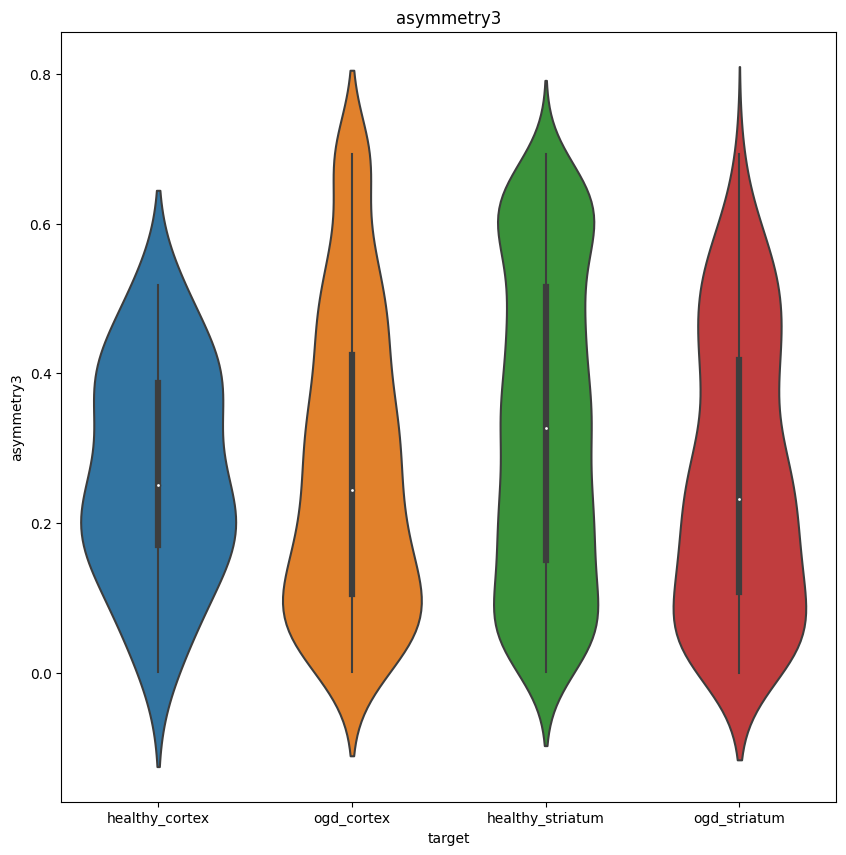

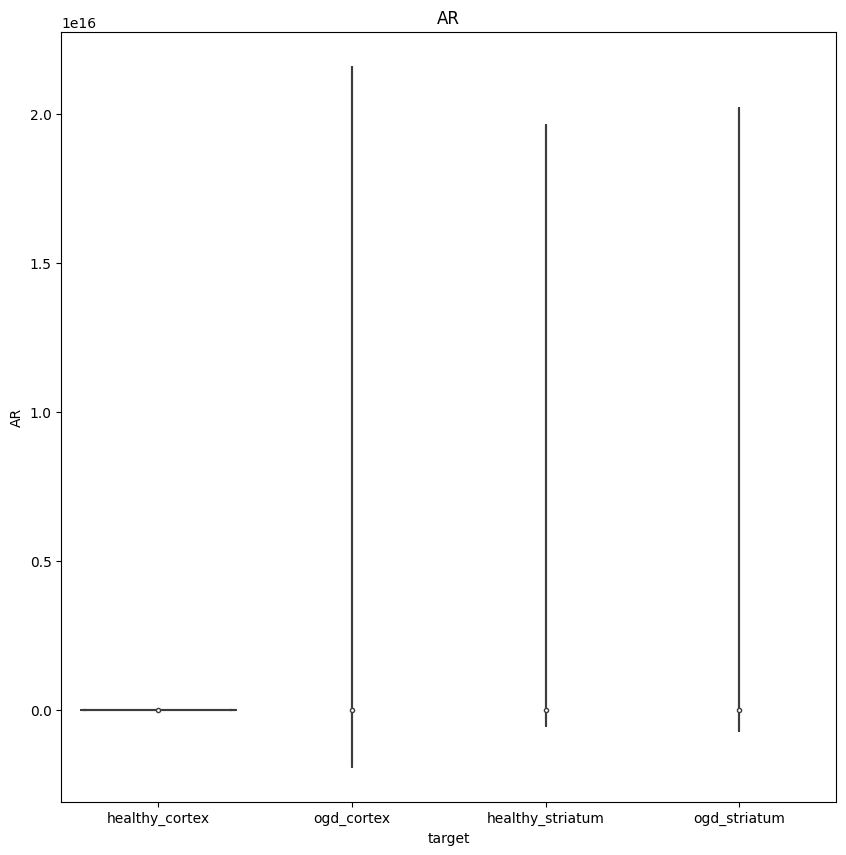

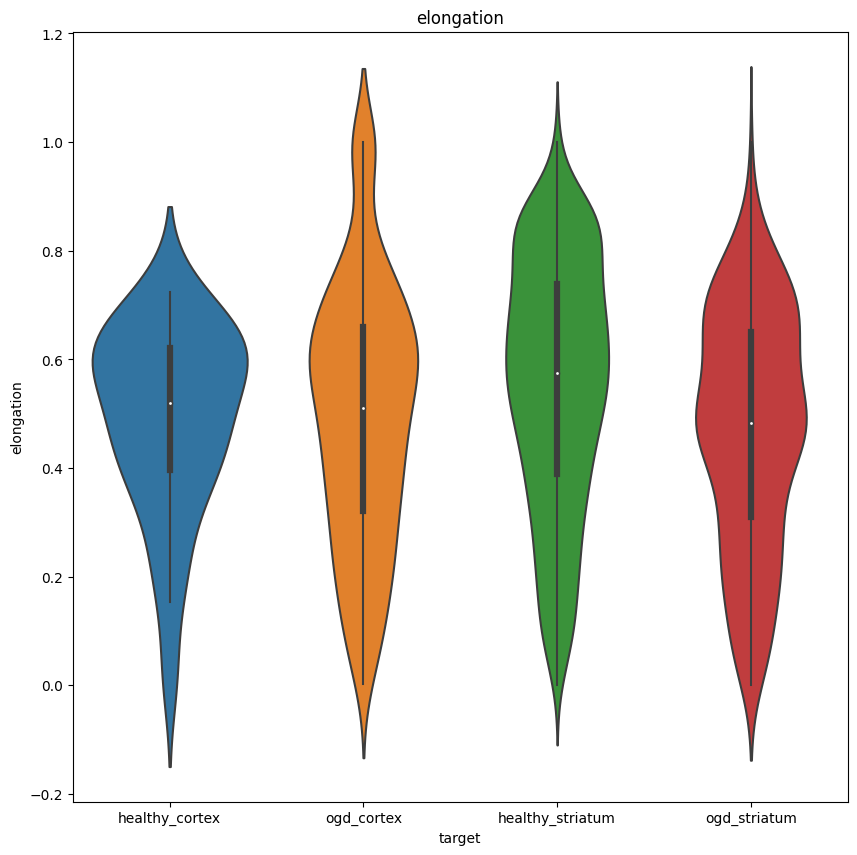

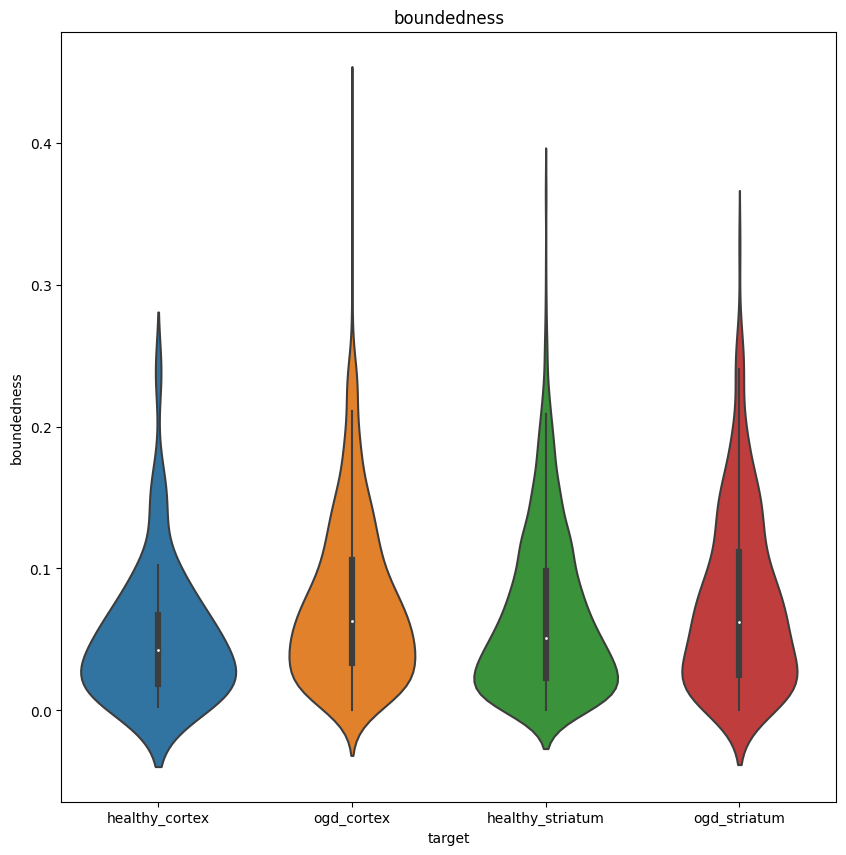

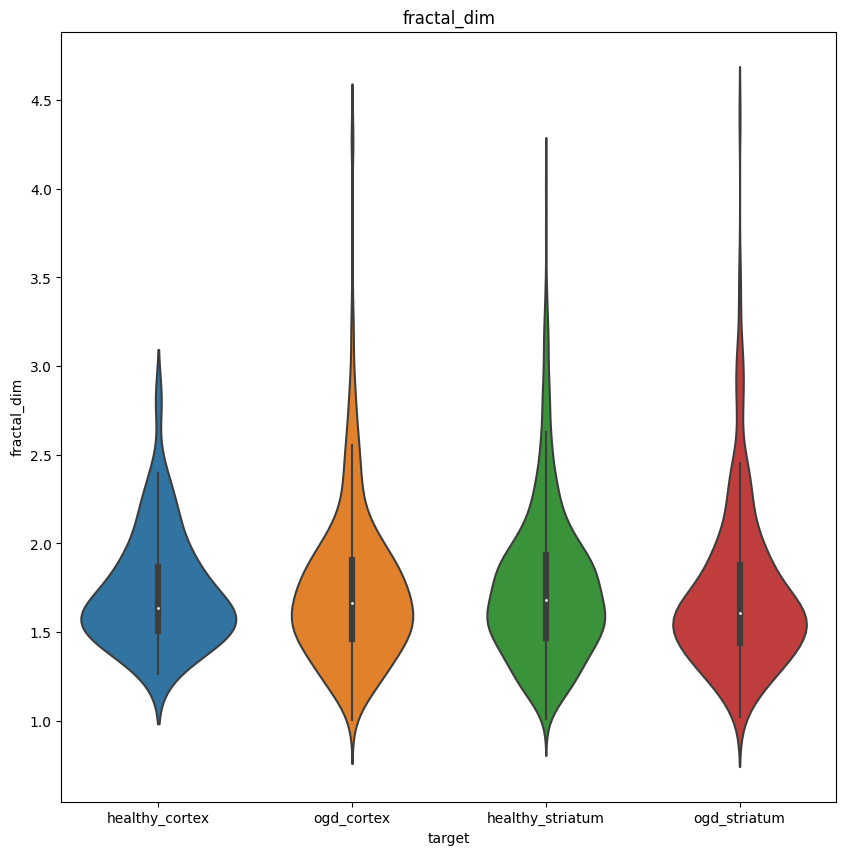

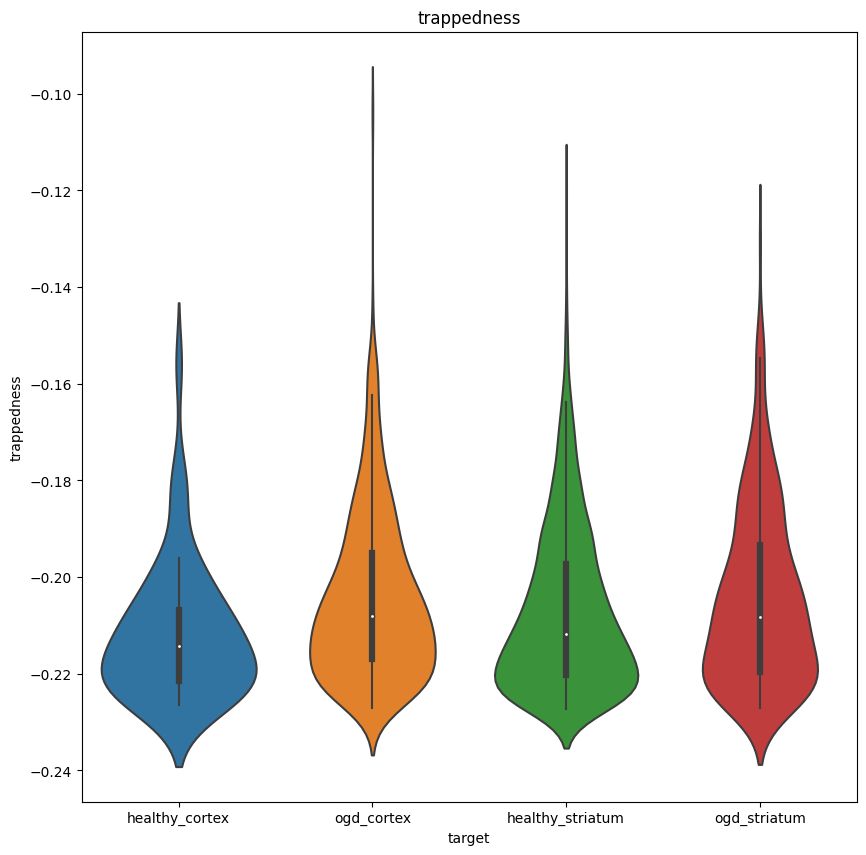

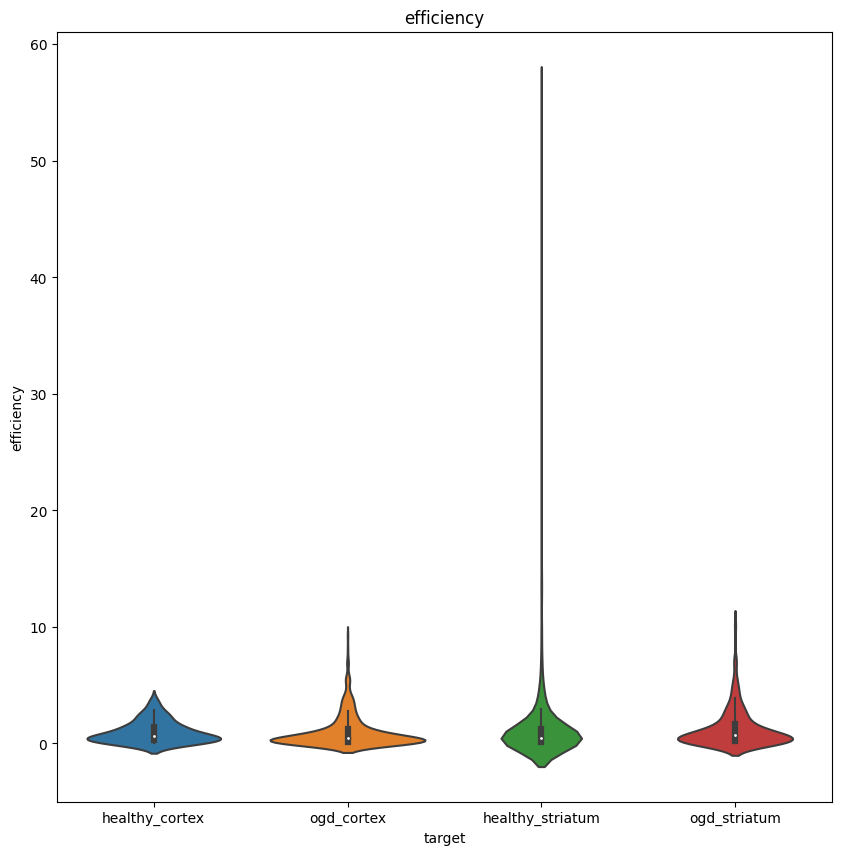

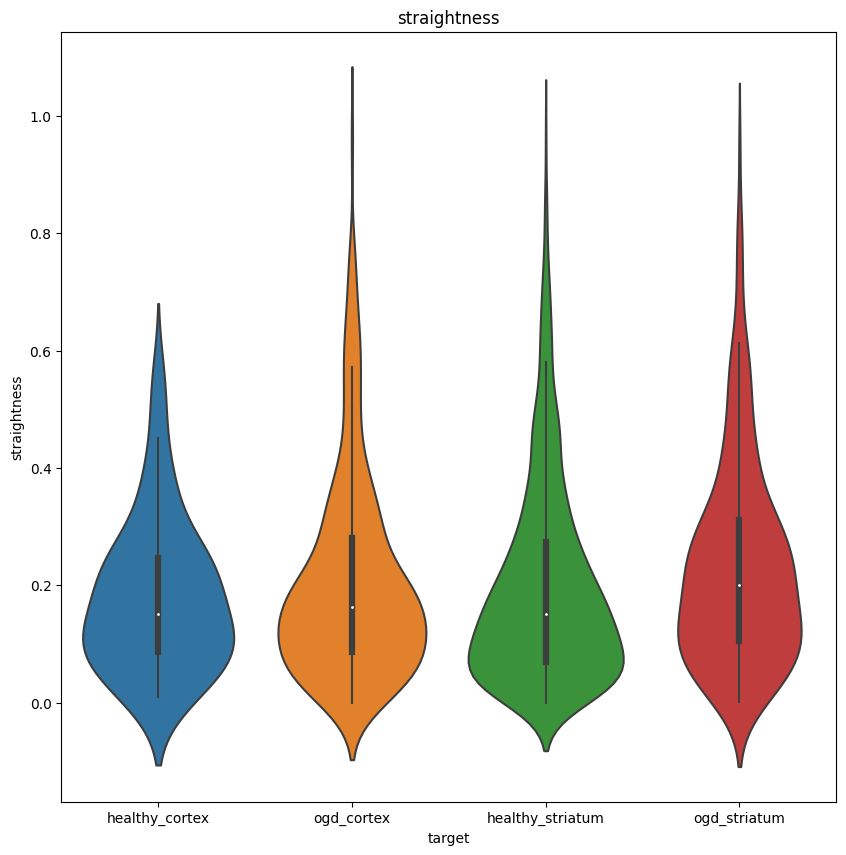

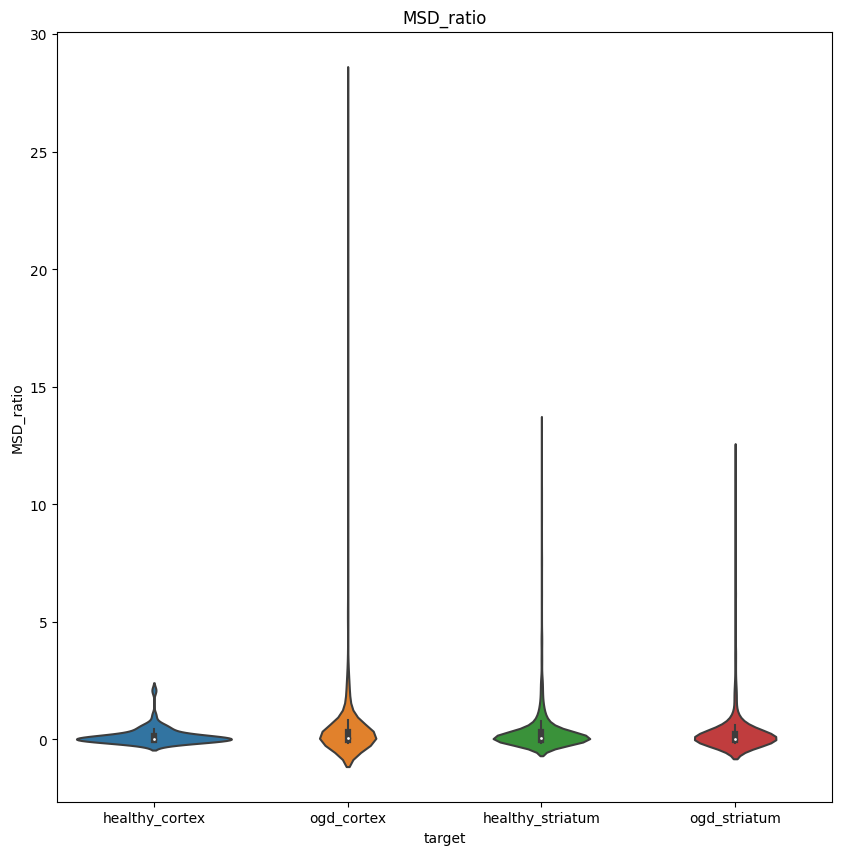

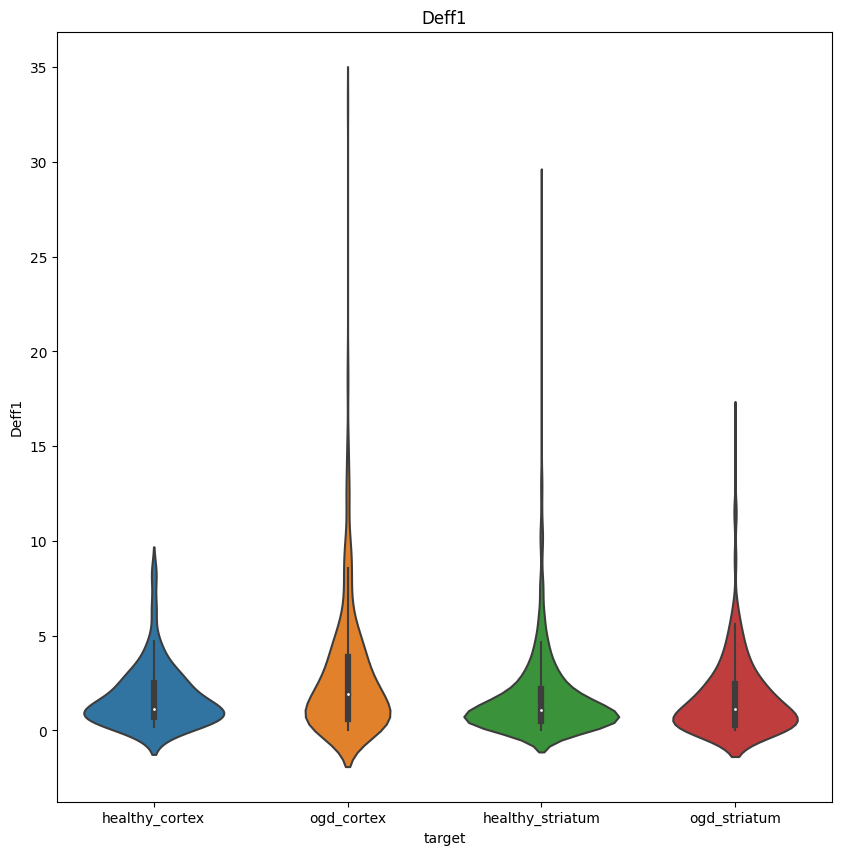

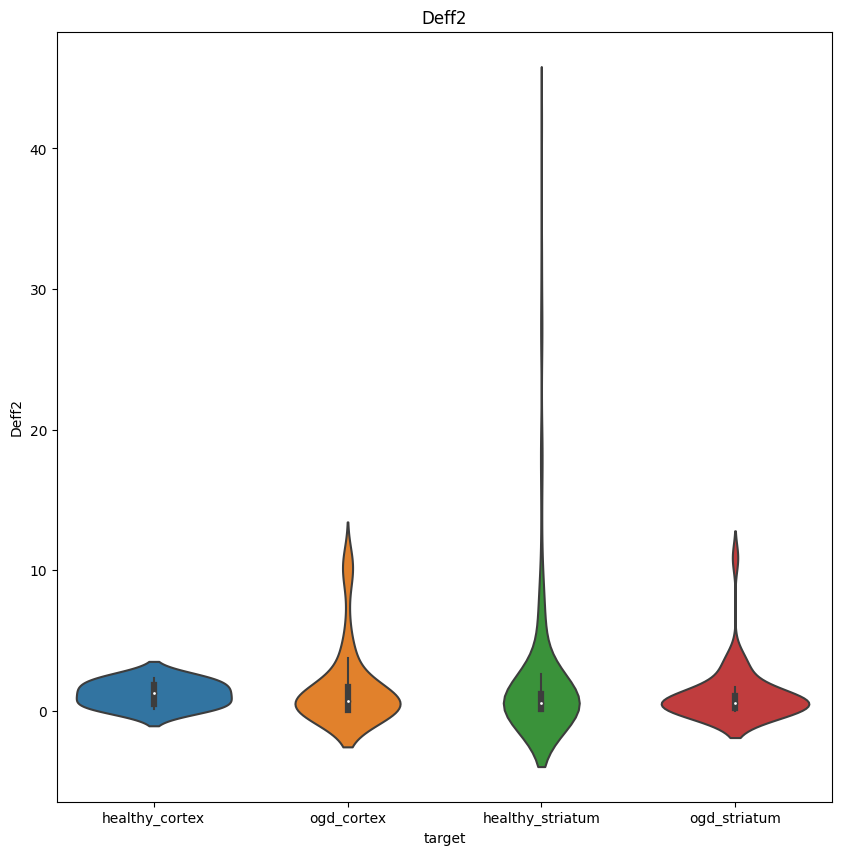

In [24]:
for feature in feature_list:
    print(feature)
    # if feature in ['Deff2', 'AR', 'MSD_ratio']:
    #     pass
    # else:
    #     feature_distribution_plots.feature_violin_plot(all_df_cleaned, feature, 'target', title=feature)
    feature_distribution_plots.feature_violin_plot(all_features_cleaned, feature, 'target', title=feature, figsize=(10, 10))

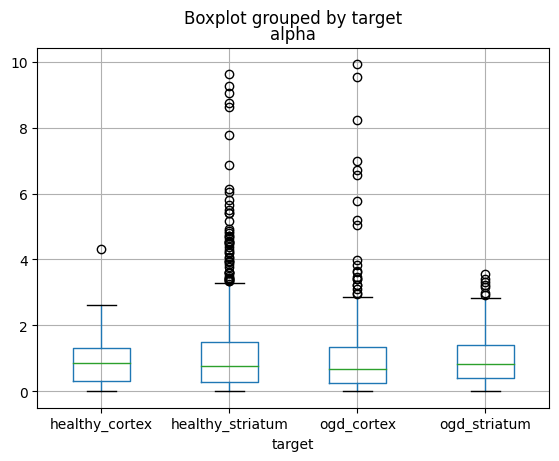

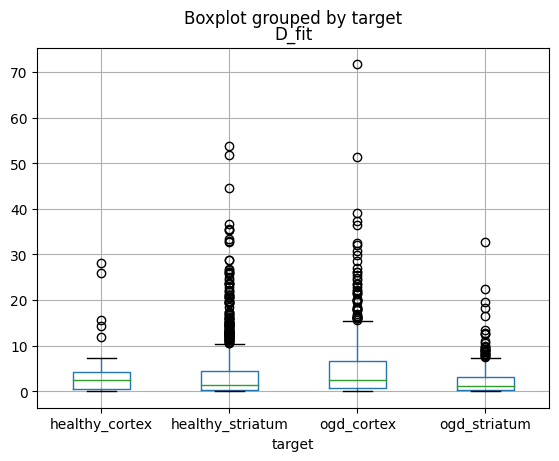

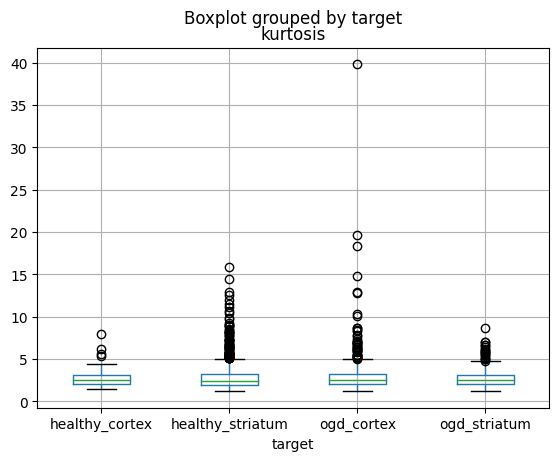

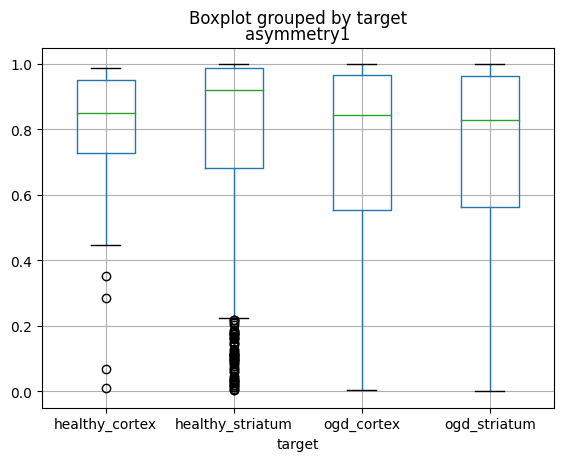

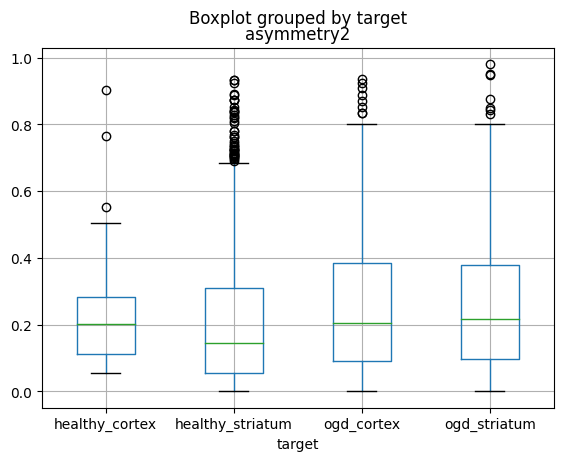

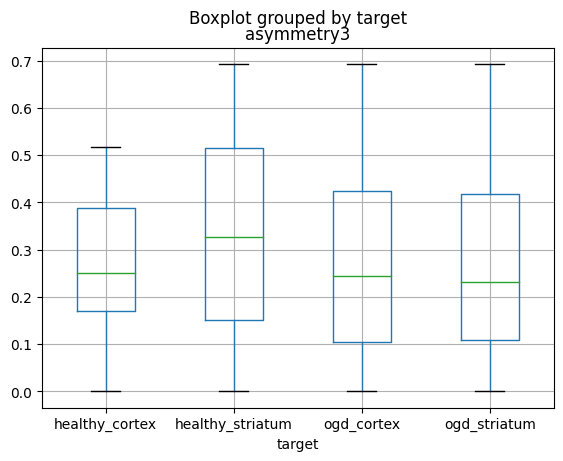

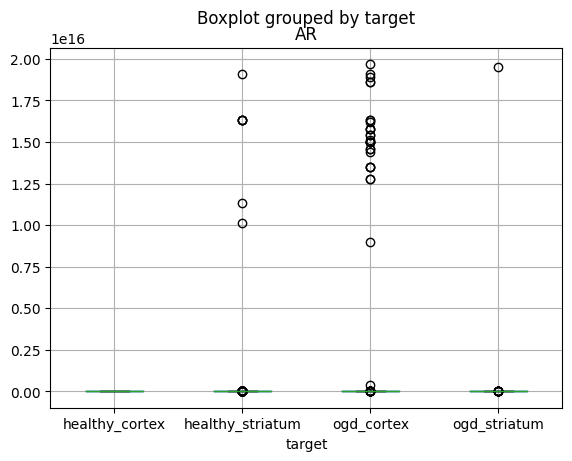

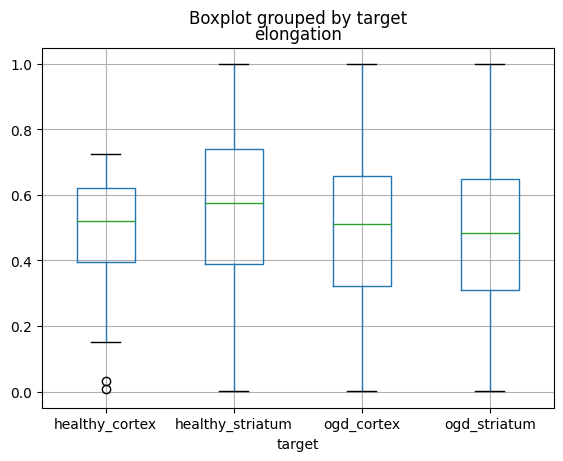

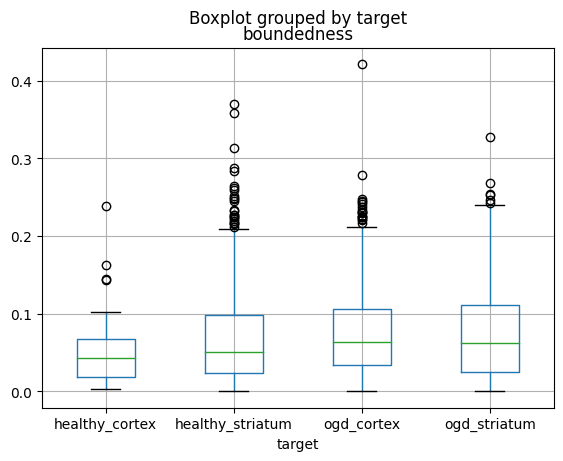

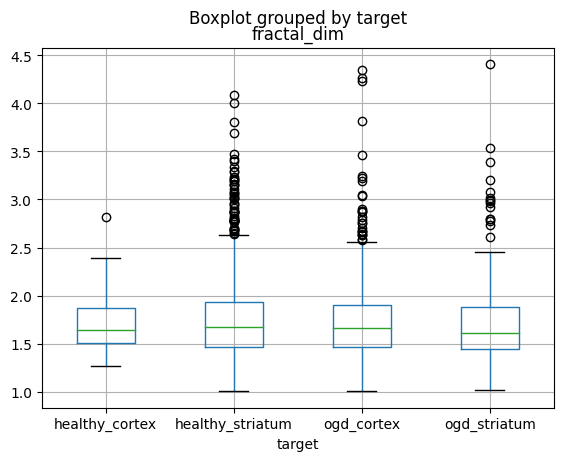

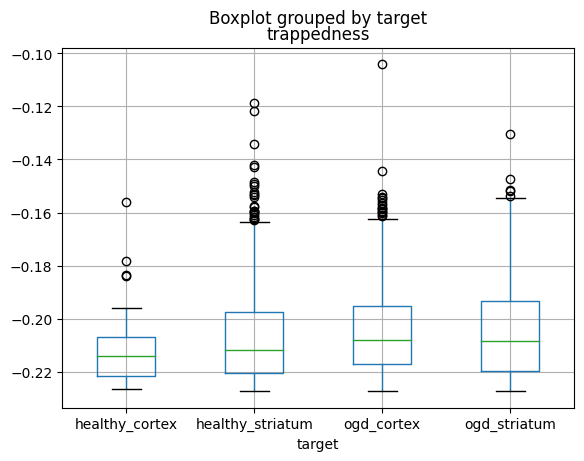

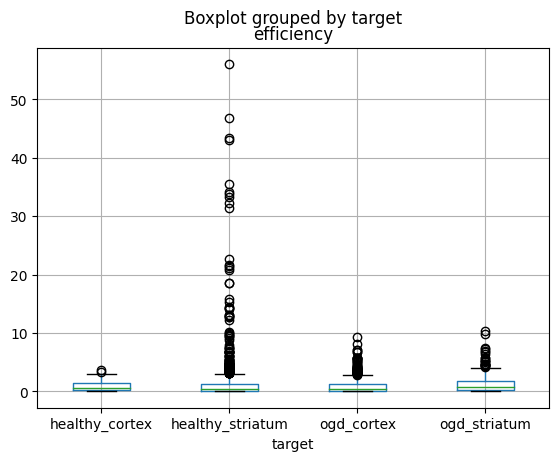

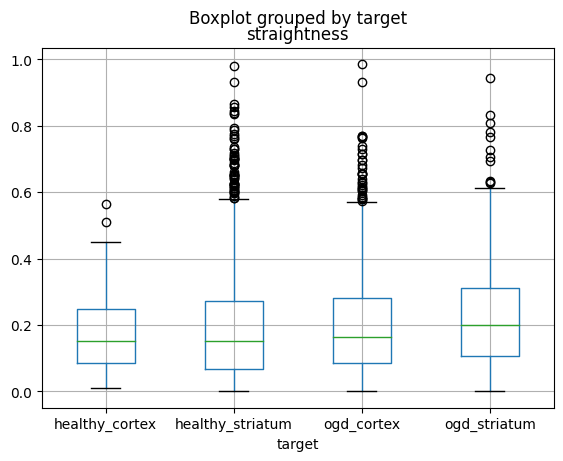

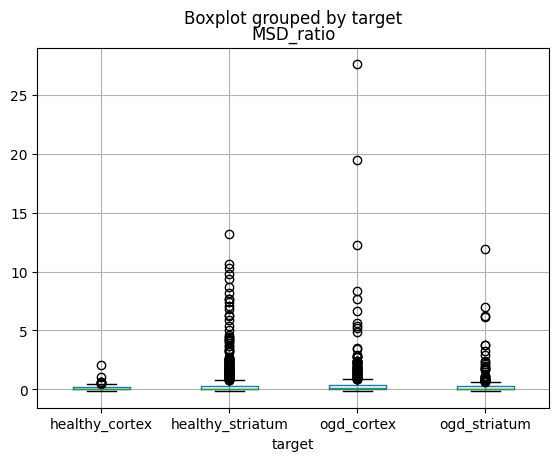

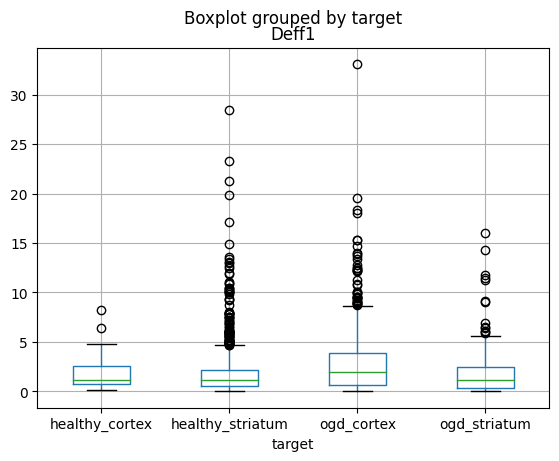

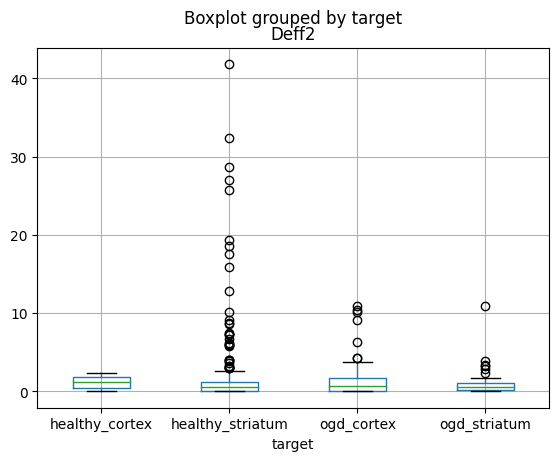

In [25]:
for feature in feature_list:
    all_features_cleaned.boxplot(feature, by='target')